In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Access your dataset
data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data.csv'

In [4]:
df = pd.read_csv(data_path)
# Display the first few rows of the DataFrame
df.head()

VIN (1-10)     County          City State  Postal Code  Model Year    Make  \
0  5YJSA1E28K  Snohomish      Mukilteo    WA      98275.0        2019   TESLA   
1  1C4JJXP68P     Yakima        Yakima    WA      98901.0        2023    JEEP   
2  WBY8P6C05L     Kitsap      Kingston    WA      98346.0        2020     BMW   
3  JTDKARFP1J     Kitsap  Port Orchard    WA      98367.0        2018  TOYOTA   
4  5UXTA6C09N  Snohomish       Everett    WA      98208.0        2022     BMW   

         Model                   Electric Vehicle Type  \
0      MODEL S          Battery Electric Vehicle (BEV)   
1     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
2           I3          Battery Electric Vehicle (BEV)   
3  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4           X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             270   
1             Not eligible due to low battery range              21   
2           Clean Alternative Fuel Vehicle Eligible             153   
3             Not eligible due to low battery range              25   
4           Clean Alternative Fuel Vehicle Eligible              30   

   Base MSRP  DOL Vehicle ID                 Vehicle Location  \
0          0       236424583     POINT (-122.29943 47.912654)   
1          0       249905295  POINT (-120.4688751 46.6046178)   
2          0       260917289  POINT (-122.5178351 47.7981436)   
3          0       186410087  POINT (-122.6530052 47.4739066)   
4          0       186076915  POINT (-122.2032349 47.8956271)   

         Electric Utility  2020 Census Tract  
0  PUGET SOUND ENERGY INC       5.306104e+10  
1              PACIFICORP       5.307700e+10  
2  PUGET SOUND ENERGY INC       5.303509e+10  
3  PUGET SOUND ENERGY INC       5.303509e+10  
4  PUGET SOUND ENERGY INC       5.306104e+10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200040 entries, 0 to 200039
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200040 non-null  object 
 1   County                                             200040 non-null  object 
 2   City                                               200040 non-null  object 
 3   State                                              200040 non-null  object 
 4   Postal Code                                        200040 non-null  float64
 5   Model Year                                         200040 non-null  int64  
 6   Make                                               200040 non-null  object 
 7   Model                                              200040 non-null  object 
 8   Electric Vehicle Type                              200040 non-null  object

In [6]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  200040.000000  200040.000000   200040.000000  200040.000000   
mean    98176.168966    2020.871336       53.464812     784.137822   
std      2424.231184       2.994938       88.726489    6133.558906   
min      1731.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98372.000000    2023.000000       53.000000       0.000000   
max     99577.000000    2025.000000      322.000000   52900.000000   

       DOL Vehicle ID  2020 Census Tract  
count    2.000400e+05       2.000400e+05  
mean     2.262969e+08       5.297545e+10  
std      7.282079e+07       1.605644e+09  
min      4.385000e+03       1.001020e+09  
25%      1.904573e+08       5.303301e+10  
50%      2.363394e+08       5.303303e+10  
75%      2.609659e+08       5.305307e+10  
max      4.792548e+08       5.602100e+10

**Analyze Consumer Preferences by Vehicle Type**

**Distribution of BEVs vs. PHEVs**

Electric Vehicle Type
Battery Electric Vehicle (BEV)            156952
Plug-in Hybrid Electric Vehicle (PHEV)     43088
Name: count, dtype: int64


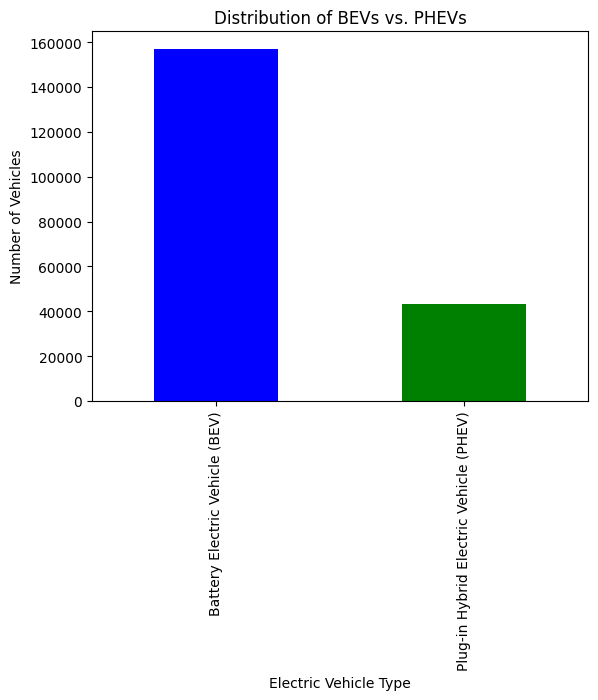

In [7]:
# Count the number of BEVs and PHEVs
ev_type_distribution = df['Electric Vehicle Type'].value_counts()

# Display the distribution
print(ev_type_distribution)

# Plot the distribution
import matplotlib.pyplot as plt
ev_type_distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of BEVs vs. PHEVs')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.show()


**Findings**

- BEVs Dominance: The number of BEVs is significantly higher than PHEVs, with around 160,000 BEVs compared to approximately 45,000 PHEVs.

- Consumer Preference: This indicates a clear consumer preference for fully electric vehicles (BEVs) over hybrids (PHEVs).

**Distribution of BEVs vs. PHEVs by County**

Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Ada                                               2.0   
Adams                                            41.0   
Alameda                                           4.0   
Albemarle                                         1.0   
Alexandria                                        3.0   
...                                               ...   
Williamson                                        1.0   
Yakima                                          842.0   
Yolo                                              2.0   
York                                              1.0   
Yuba                                              1.0   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
County                                                         
Ada                                                       NaN  
Adams                                                    21.0  
Al

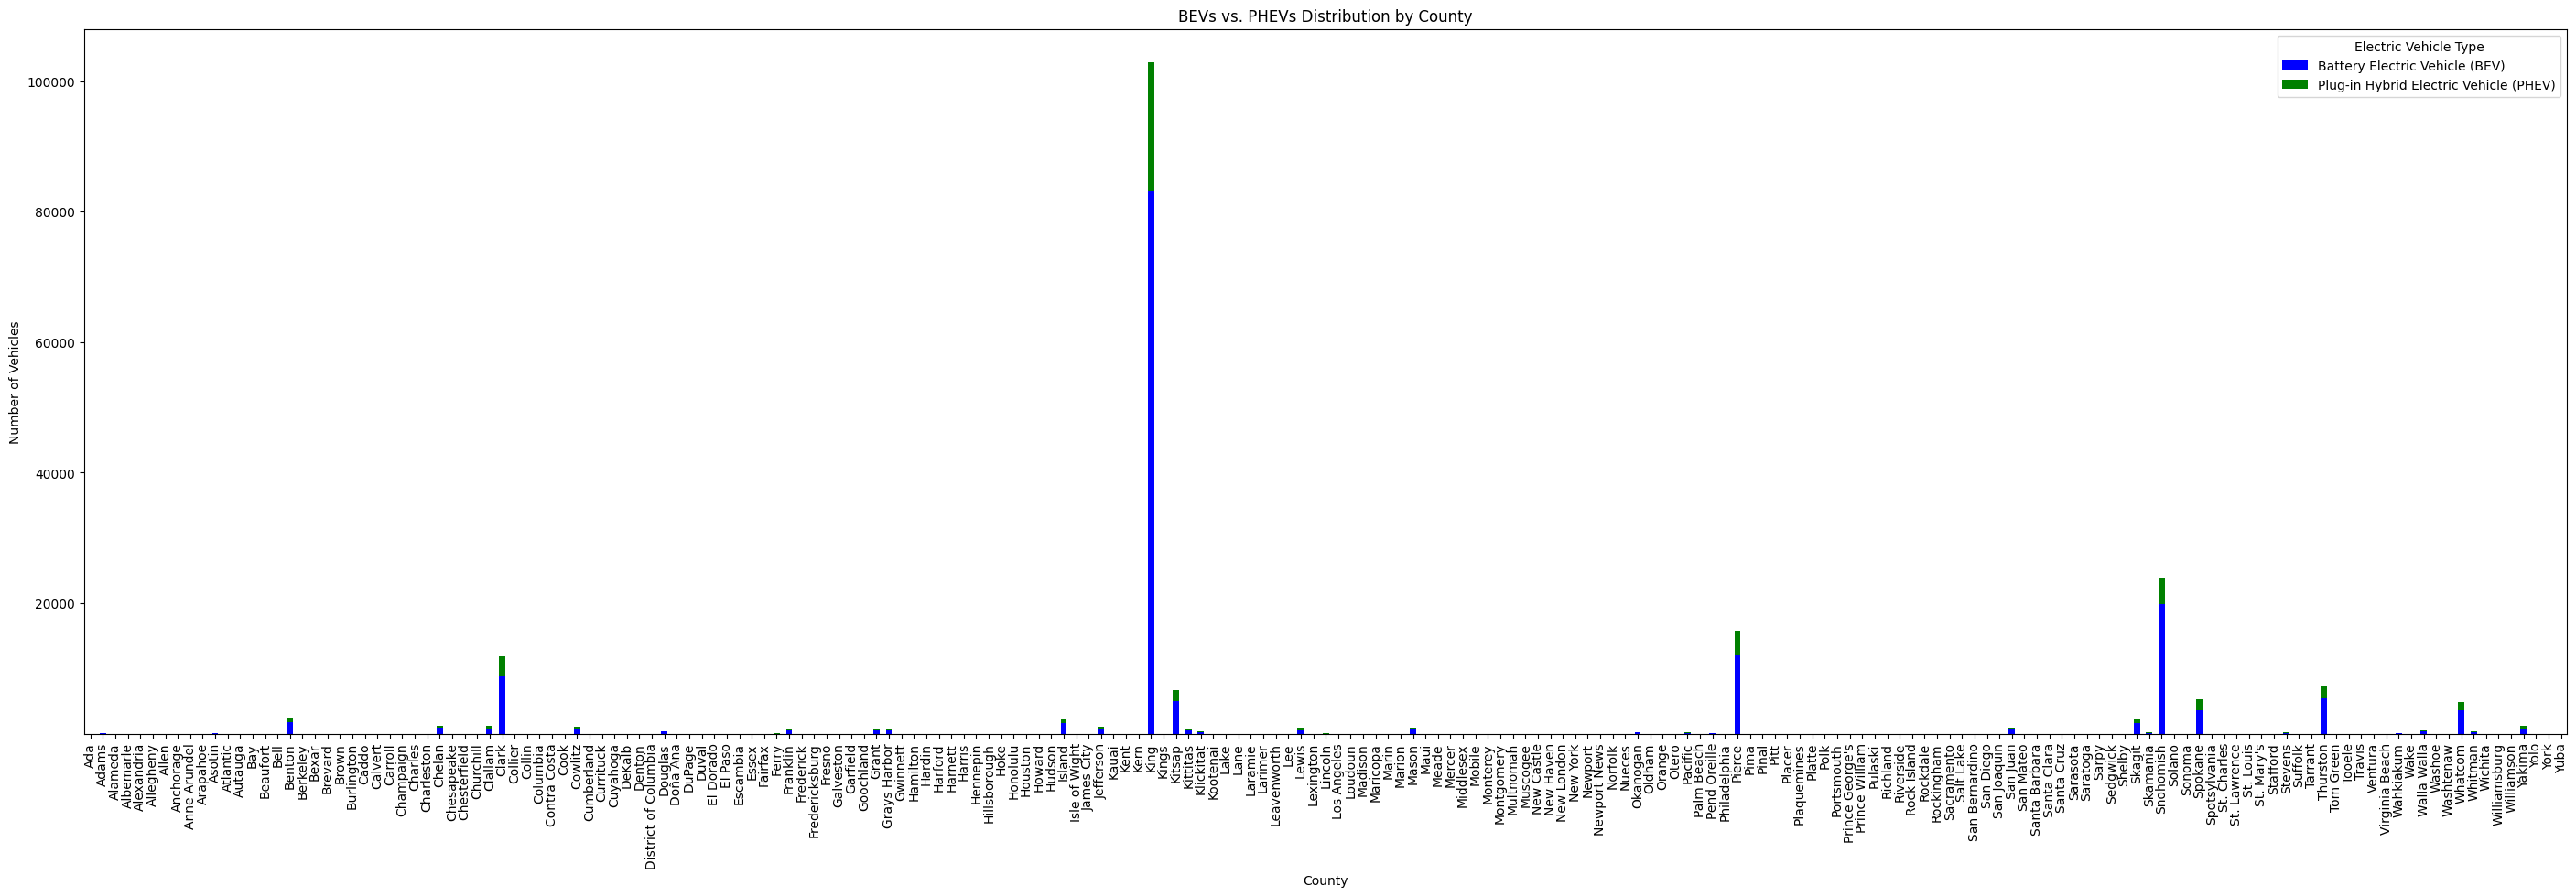

In [10]:
# Group by County and Electric Vehicle Type
ev_type_by_county = df.groupby(['County', 'Electric Vehicle Type']).size().unstack()

# Display the distribution
print(ev_type_by_county)

# Plot the distribution
ev_type_by_county.plot(kind='bar', stacked=True, figsize=(35, 10), color=['blue', 'green'])
plt.title('BEVs vs. PHEVs Distribution by County')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.show()


**Findings**

- King County stands out with a significantly higher number of both BEVs and PHEVs compared to other counties. This further emphasizes King County as a major hub for electric vehicle adoption in Washington State.

- Other counties such as Snohomish, Pierce, and Clark show moderate levels of BEV and PHEV adoption, but these numbers are much lower compared to King County. Most other counties have relatively low counts, indicating slower adoption in more rural or less densely populated areas.

- Across most counties, BEVs are more prevalent than PHEVs, which is consistent with the general preference for fully electric vehicles.

**Analyze Popular Makes and Models**

**Most Popular Makes**

Make
TESLA         88081
CHEVROLET     14804
NISSAN        14416
FORD          10547
KIA            8762
BMW            8294
TOYOTA         7681
VOLKSWAGEN     5565
HYUNDAI        5475
JEEP           5287
Name: count, dtype: int64


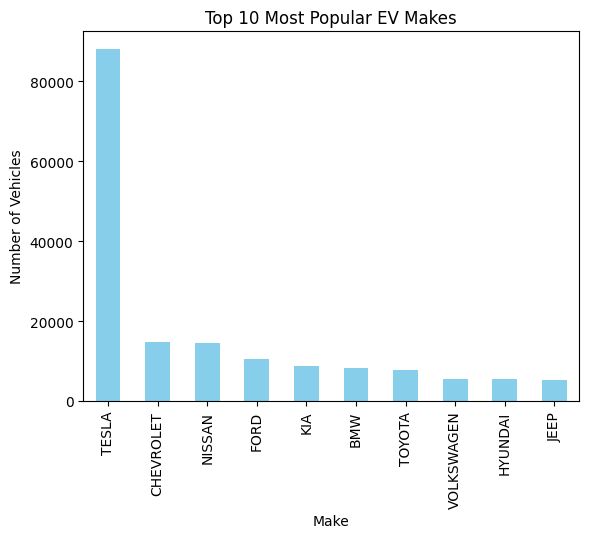

In [66]:
# Count the number of vehicles by make
make_distribution = df['Make'].value_counts()

# Display the top 10 most popular makes
print(make_distribution.head(10))

# Plot the top 10 most popular makes
make_distribution.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular EV Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.show()


**Findings**

- Tesla is by far the most popular EV make, with over 80,000 vehicles registered, significantly outpacing all other manufacturers. This shows Tesla's strong market presence in the EV sector.

- Chevrolet and Nissan follow, but with a much lower number of vehicles compared to Tesla, each having around 10,000 to 15,000 vehicles.

- The remaining brands like Ford, Kia, BMW, Toyota, and Volkswagen have smaller but still notable shares in the EV market. Their numbers range from around 5,000 to 10,000 vehicles.

- Hyundai and Jeep make up the bottom of the top 10, indicating that they are less popular EV choices among consumers compared to other brands.

**Most Popular Models**

Model
MODEL Y           41986
MODEL 3           31608
LEAF              13496
MODEL S            7868
BOLT EV            6643
MODEL X            6186
VOLT               4829
ID.4               4484
MUSTANG MACH-E     3981
WRANGLER           3946
Name: count, dtype: int64


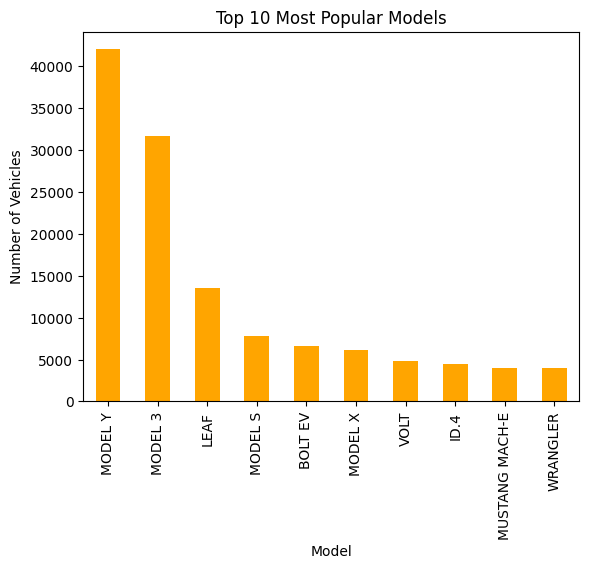

In [12]:
# Count the number of vehicles by model
model_distribution = df['Model'].value_counts()

# Display the top 10 most popular models
print(model_distribution.head(10))

# Plot the top 10 most popular models
model_distribution.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Models')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.show()


**Findings**

- Tesla's Model Y is the most popular model, with over 40,000 vehicles, followed by the Model 3 with over 30,000 vehicles. These two models dominate the EV market, highlighting Tesla's strong presence.

- The Nissan Leaf is the third most popular model, with a noticeable drop in numbers compared to Tesla models, around 15,000 vehicles.

- The Tesla Model S and Model X are also in the top 10, though with fewer registrations compared to the Model Y and Model 3, showing that Tesla's other offerings are also popular, albeit to a lesser extent.

- The Chevrolet Bolt EV, Chevrolet Volt, Volkswagen ID.4, Ford Mustang Mach-E, and Jeep Wrangler round out the top 10, each with a few thousand vehicles. These models represent a mix of traditional automakers entering the EV market.

**Analyze Price Sensitivity**

Distribution of Base MSRP

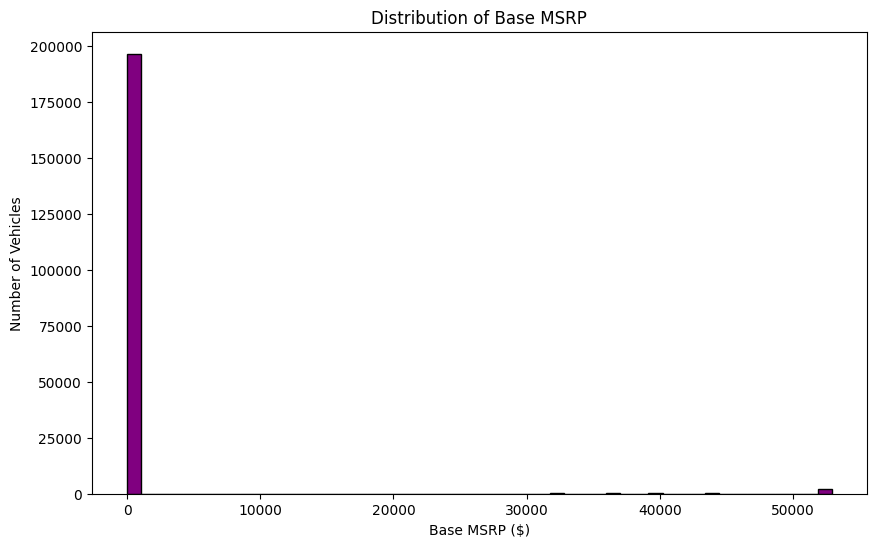

In [13]:
# Plot the distribution of Base MSRP
plt.figure(figsize=(10, 6))
plt.hist(df['Base MSRP'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Number of Vehicles')
plt.show()


**Electric Range Analysis**

**Distribution of Electric Range**

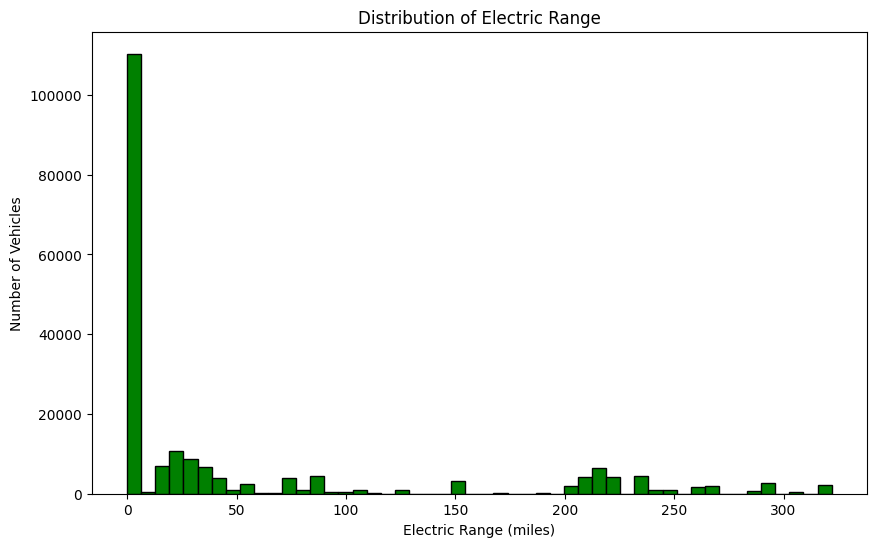

In [14]:
# Plot the distribution of Electric Range
plt.figure(figsize=(10, 6))
plt.hist(df['Electric Range'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.show()


**Findings**

- The majority of vehicles have an electric range close to 0 miles, which likely represents plug-in hybrid electric vehicles (PHEVs) that have a limited electric-only range or vehicles with a very low state of charge (SOC) in the dataset.

- There are smaller peaks around 100-150 miles and again around 200-300 miles. These peaks likely represent the fully electric vehicles (BEVs) that typically have longer ranges, such as Tesla models and other long-range electric vehicles.


- The tail end of the distribution indicates that there are fewer vehicles with very high electric ranges, above 200 miles, but these are significant in terms of their importance for long-distance driving.

**Most Popular Makes by County**

**Calculate the Most Popular Make in Each County**

In [15]:
# Group by County and Make, then count the number of vehicles for each make in each county
make_by_county = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Sort the values within each county to get the most popular make
most_popular_make_by_county = make_by_county.loc[make_by_county.groupby('County')['Count'].idxmax()]

# Display the most popular make by county
print(most_popular_make_by_county)


          County   Make  Count
0            Ada  TESLA      2
11         Adams  TESLA     23
17       Alameda  TESLA      2
18     Albemarle  TESLA      1
20    Alexandria  TESLA      2
...          ...    ...    ...
1274  Williamson  TESLA      1
1302      Yakima  TESLA    529
1306        Yolo  TESLA      1
1308        York  TESLA      1
1309        Yuba  TESLA      1

[199 rows x 3 columns]


**Visualize the Most Popular Makes by County**

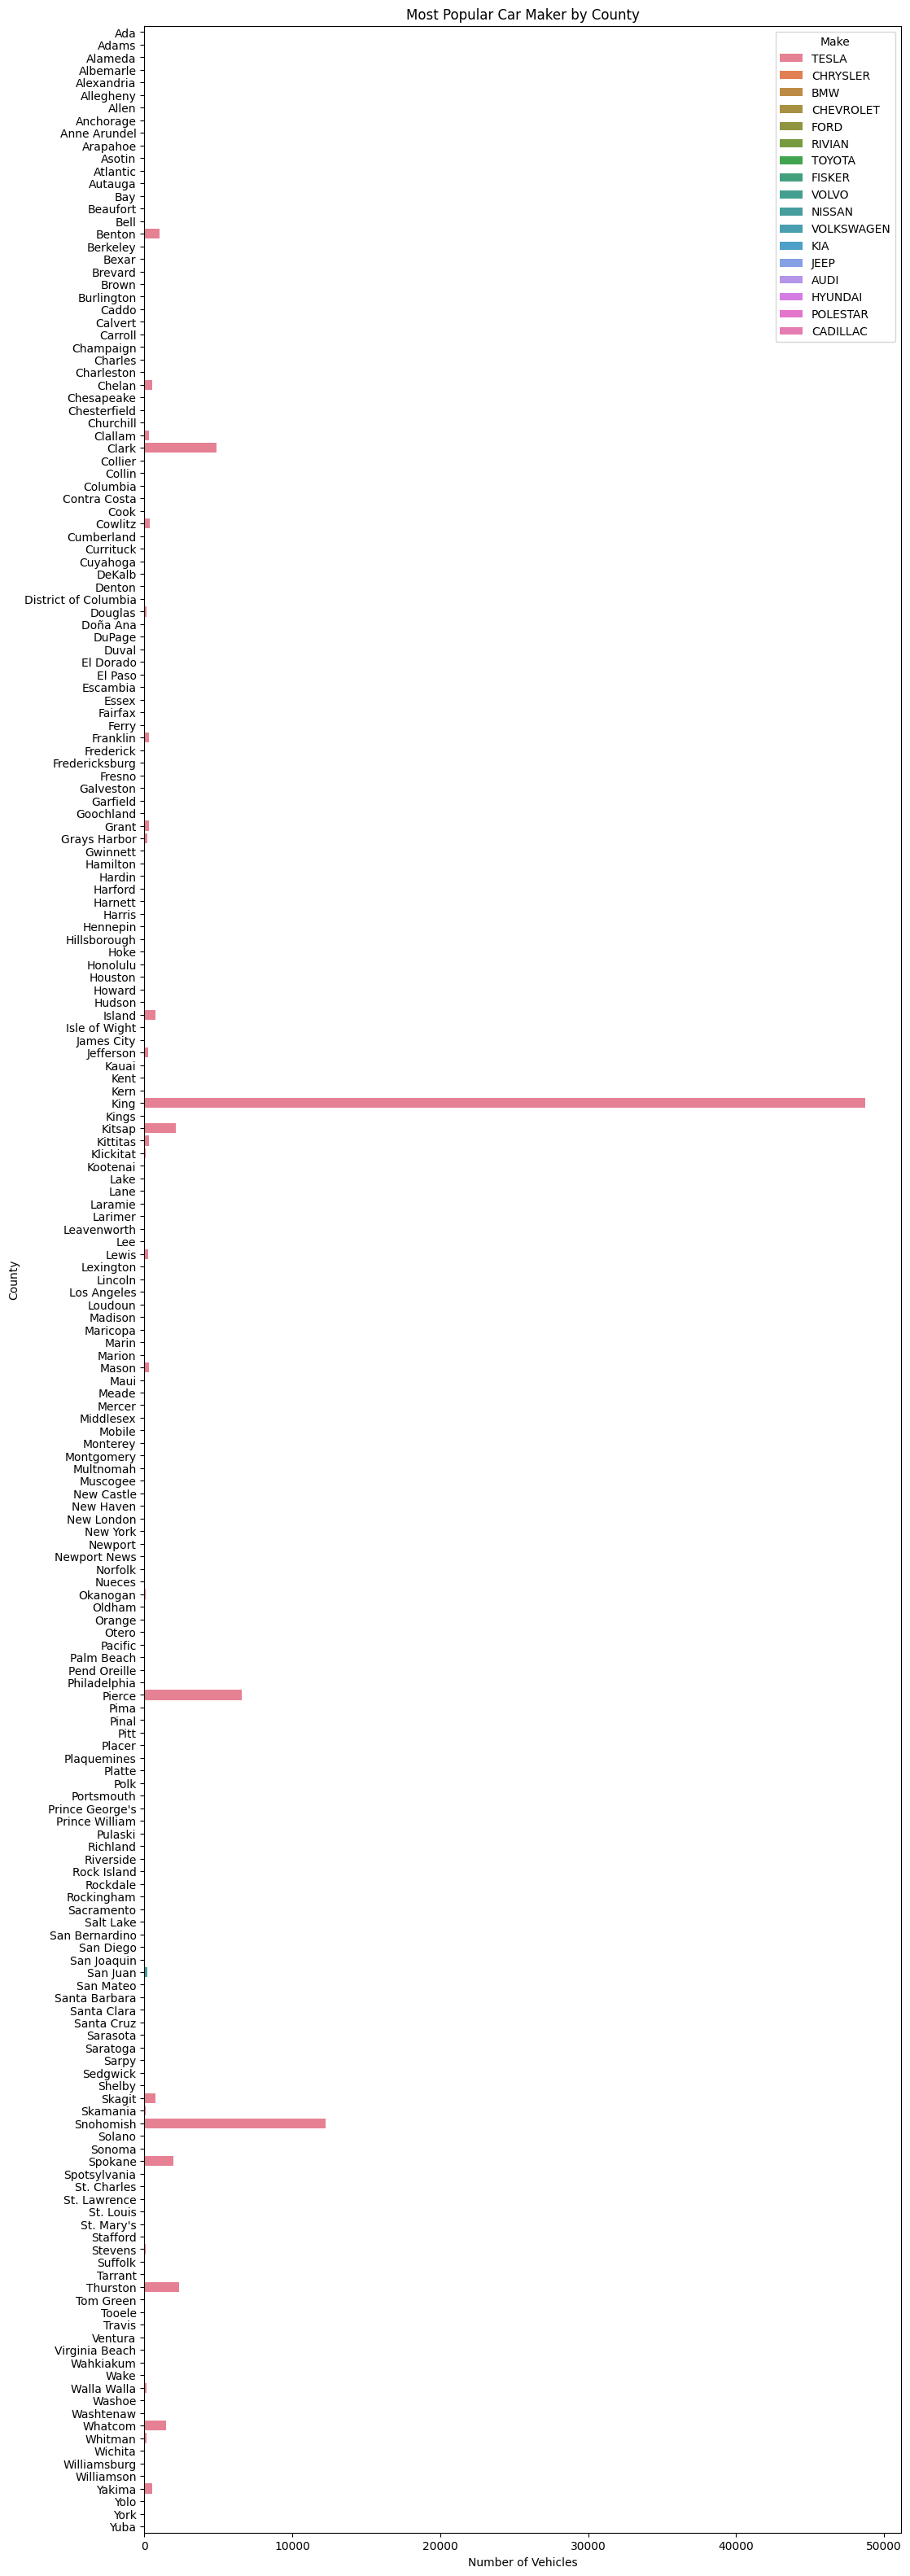

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the most popular make by county
plt.figure(figsize=(12, 40))
sns.barplot(x='Count', y='County', hue='Make', data=most_popular_make_by_county, dodge=False)
plt.title('Most Popular Car Maker by County')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.show()


**Findings**

- Tesla is overwhelmingly the most popular EV maker in the majority of counties, as indicated by the significant number of Tesla vehicles in these areas. Counties like King, Snohomish, and Pierce show especially high numbers of Tesla vehicles, reflecting the brand's strong market presence.

- While Tesla dominates, there are some counties where other EV makers, such as Chevrolet, Nissan, and BMW, are more popular. This variation indicates that while Tesla has a broad appeal, other manufacturers are also significant players in certain regions.


- The chart highlights regional preferences, where certain counties might favor one brand over another, possibly due to factors such as local dealerships, consumer demographics, or infrastructure support.


**Identify the Top 20 Counties with the Most Electric Vehicles**

In [23]:
# Group by County and count the number of electric vehicles in each county
ev_count_by_county = df.groupby('County').size().reset_index(name='Total EVs')

# Sort counties by the total number of electric vehicles and get the top 20
top_20_counties = ev_count_by_county.sort_values(by='Total EVs', ascending=False).head(20)

# Display the top 20 counties
print(top_20_counties)


           County  Total EVs
85           King     102837
166     Snohomish      23933
132        Pierce      15739
33          Clark      11872
179      Thurston       7297
87         Kitsap       6686
169       Spokane       5261
190       Whatcom       4829
16         Benton       2482
164        Skagit       2171
78         Island       2141
28         Chelan       1207
195        Yakima       1189
32        Clallam       1184
81      Jefferson       1099
39        Cowlitz       1039
154      San Juan       1010
106         Mason        931
97          Lewis        897
64   Grays Harbor        731


**Determine the Most Popular Make in Each of the Top 20 Counties**

In [24]:
# Filter the dataset to include only the top 20 counties
df_top_20_counties = df[df['County'].isin(top_20_counties['County'])]

# Group by County and Make, then count the number of vehicles for each make in each county
make_by_top_20_counties = df_top_20_counties.groupby(['County', 'Make']).size().reset_index(name='Count')

# Sort the values within each county to get the most popular make
most_popular_make_by_top_20_counties = make_by_top_20_counties.loc[make_by_top_20_counties.groupby('County')['Count'].idxmax()]

# Display the most popular make by the top 20 counties
print(most_popular_make_by_top_20_counties)


           County    Make  Count
29         Benton   TESLA   1017
60         Chelan   TESLA    516
89        Clallam   TESLA    317
125         Clark   TESLA   4870
156       Cowlitz   TESLA    393
182  Grays Harbor   TESLA    219
215        Island   TESLA    750
242     Jefferson   TESLA    255
282          King   TESLA  48721
317        Kitsap   TESLA   2151
344         Lewis   TESLA    238
374         Mason   TESLA    341
410        Pierce   TESLA   6571
434      San Juan  NISSAN    218
473        Skagit   TESLA    767
510     Snohomish   TESLA  12274
543       Spokane   TESLA   1944
578      Thurston   TESLA   2350
615       Whatcom   TESLA   1457
647        Yakima   TESLA    529


**Visualize the Most Popular Makes by Top 20 Counties**

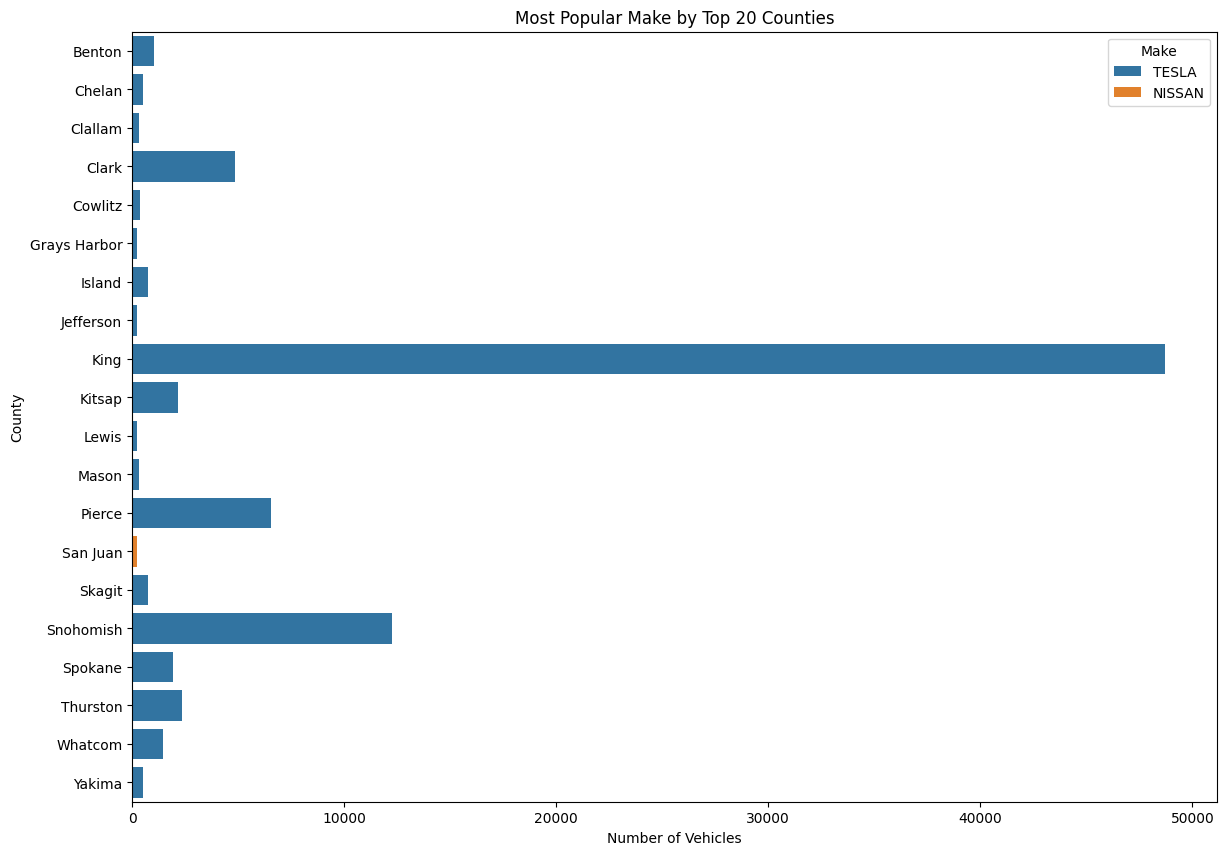

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the most popular make by the top 20 counties
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='County', hue='Make', data=most_popular_make_by_top_20_counties, dodge=False)
plt.title('Most Popular Make by Top 20 Counties')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.show()


**Findings**

- Tesla is the most popular EV make in almost all of the top 20 counties, with King County having an exceptionally high number of Tesla vehicles compared to other counties. This reaffirms Tesla's strong market presence in Washington State.

- King County alone has more Tesla vehicles than any other county, reflecting its status as a major hub for EV adoption. The number of Teslas in King County significantly overshadows the numbers in other counties.

- Snohomish and Pierce Counties also show a considerable number of Tesla vehicles, though still much lower than King County. Clark County follows with a moderate number of Teslas.

- Nissan appears as the most popular make in San Juan County, but its presence is minimal compared to Tesla's dominance across the other counties.


**Most Popular Makes by City**

**Calculate the Most Popular Make in Each City**

In [20]:
# Group by City and Make, then count the number of vehicles for each make in each city
make_by_city = df.groupby(['City', 'Make']).size().reset_index(name='Count')

# Sort the values within each city to get the most popular make
most_popular_make_by_city = make_by_city.loc[make_by_city.groupby('City')['Count'].idxmax()]

# Display the most popular make by city
print(most_popular_make_by_city.head(20))  # Display the top 20 cities as an example


                        City    Make  Count
16                  Aberdeen   TESLA     47
20   Aberdeen Proving Ground   TESLA      1
22                      Acme    FORD      2
28                      Addy   TESLA      2
29                      Adna  NISSAN      1
39            Airway Heights   TESLA     11
42                   Alameda    FORD      1
44                    Albion    MINI      1
45                 Alderdale  RIVIAN      1
46           Alderwood Manor  NISSAN      1
47                     Aldie   TESLA      2
49                Alexandria   TESLA      4
59                    Algona   TESLA     20
75                     Allyn   TESLA     38
79                    Almira     KIA      1
81               Amanda Park   TESLA      2
92                     Amboy   TESLA      8
120                Anacortes   TESLA    269
134          Anderson Island   TESLA     19
137   Andrews Air Force Base   TESLA      1


**Visualize the Most Popular Makes by City**

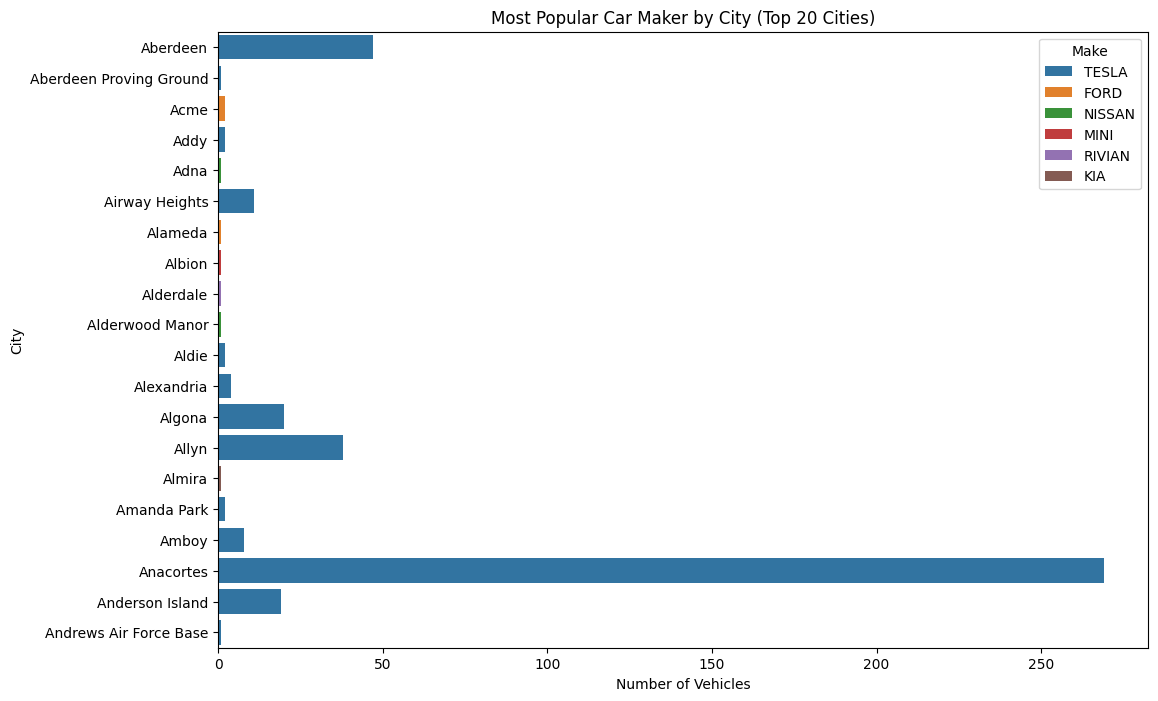

In [22]:
# Plot the most popular make by city (for the top 20 cities)
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='City', hue='Make', data=most_popular_make_by_city.head(20), dodge=False)
plt.title('Most Popular Car Maker by City (Top 20 Cities)')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.show()


**Findings**

- Tesla is overwhelmingly the most popular EV make in most of the top 20 cities, particularly in cities like Anacortes, Allyn, and Algona. This consistent dominance underscores Tesla's market strength across various cities.

- The number of Tesla vehicles is notably high in Anacortes, where it far exceeds the number of Tesla vehicles in other cities. Allyn and Aberdeen also show a significant number of Teslas, though still much less compared to Anacortes.

- Other car makers like Ford, Nissan, MINI, and Rivian appear in a few cities but with much lower counts compared to Tesla. For example, Ford shows up in Acme, and Nissan in Alderwood Manor, but their presence is minimal.

- In some cities, a single EV make like Tesla completely dominates the market, while in others, there is at least some presence of alternative makes, though still dwarfed by Tesla.

**To analyze the growth of different makes and models of electric vehicles by model year**

**Group the Data by Model Year, Make, and Model**

In [26]:
# Group by Model Year, Make, and Model, then count the number of vehicles for each combination
make_model_growth = df.groupby(['Model Year', 'Make', 'Model']).size().reset_index(name='Count')

# Display the first few rows to verify the grouping
print(make_model_growth.head())


   Model Year       Make        Model  Count
0        1997  CHEVROLET  S-10 PICKUP      1
1        1999       FORD       RANGER      5
2        2000       FORD       RANGER      7
3        2002     TOYOTA         RAV4      2
4        2003     TOYOTA         RAV4      1


**Analyze Growth Trends Over Time**

In [27]:
# Identify the top 5 makes and models with the most vehicles overall
top_makes_models = make_model_growth.groupby(['Make', 'Model'])['Count'].sum().nlargest(5).reset_index()

# Filter the data to include only the top makes and models
make_model_growth_top = make_model_growth[(make_model_growth['Make'].isin(top_makes_models['Make'])) &
                                          (make_model_growth['Model'].isin(top_makes_models['Model']))]

# Display the filtered data
print(make_model_growth_top.head())


    Model Year    Make    Model  Count
10        2011  NISSAN     LEAF    638
18        2012  NISSAN     LEAF    541
19        2012   TESLA  MODEL S    127
28        2013  NISSAN     LEAF   1858
30        2013   TESLA  MODEL S    725


**Visualize the Growth of Makes and Models Over the Years**

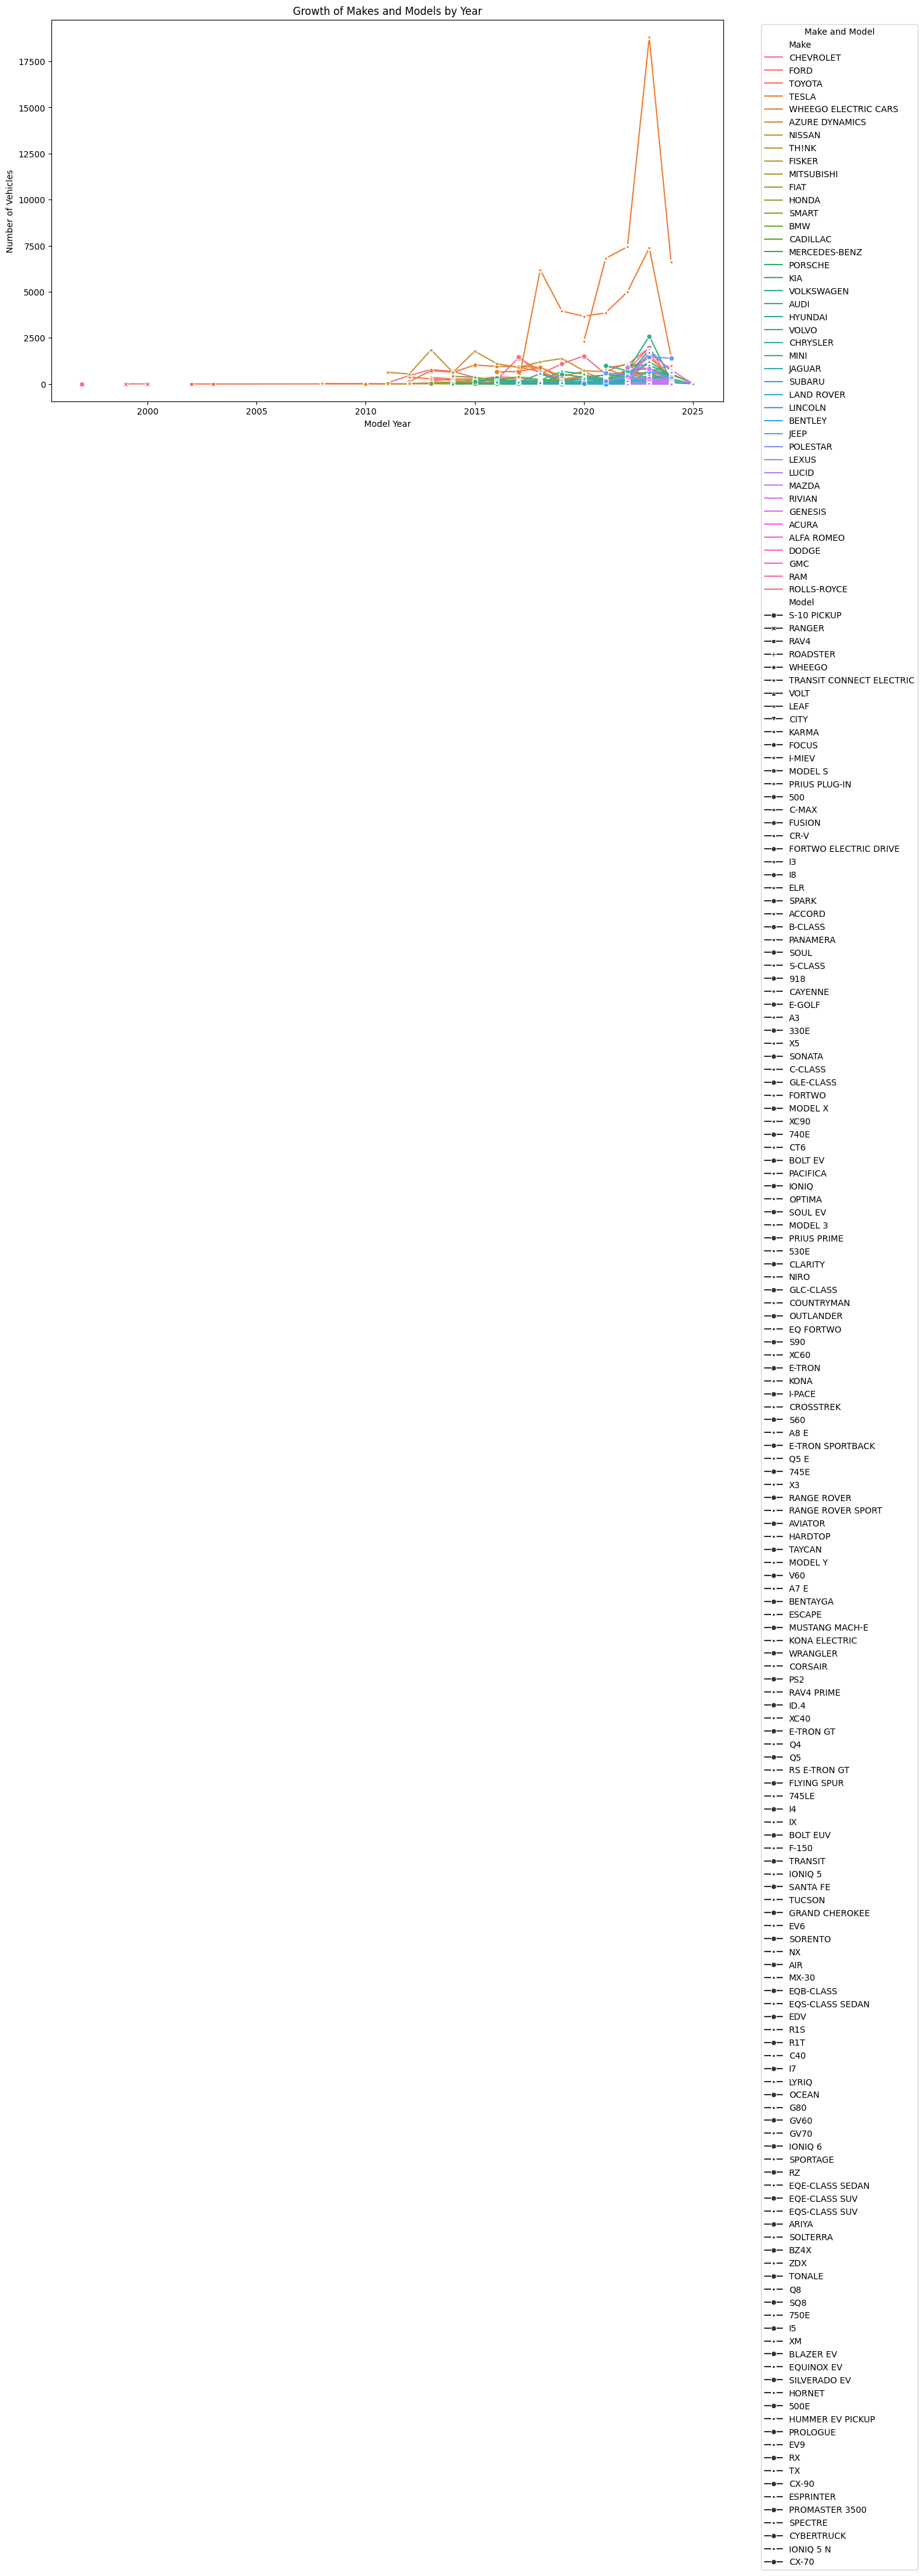

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the growth of makes and models over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=make_model_growth, x='Model Year', y='Count', hue='Make', style='Model', markers=True, dashes=False)
plt.title('Growth of Makes and Models by Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Make and Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Findings**

- Tesla models, particularly those around the 2020s, show a significant spike, indicating rapid adoption and growth during this period. Tesla's growth outpaces that of other manufacturers by a substantial margin.

- The years around 2020 to 2021 witnessed the most significant increase in EV registrations across various makes and models. This indicates a broader market acceptance and the impact of new EV models entering the market.

- While Tesla leads by a large margin, other brands like Chevrolet, Ford, and Nissan also show growth, although at a much lower scale. This suggests increasing competition in the EV market with more manufacturers offering electric models.

- Before 2015, the market was relatively small with limited EV models. Post-2015, there is a noticeable increase in the diversity of models available, reflecting the industry's rapid expansion and innovation in EV technology.

- The chart shows that some models have peaks indicating popularity spikes, but these are dwarfed by the peaks associated with Tesla models, which dominate the overall landscape.

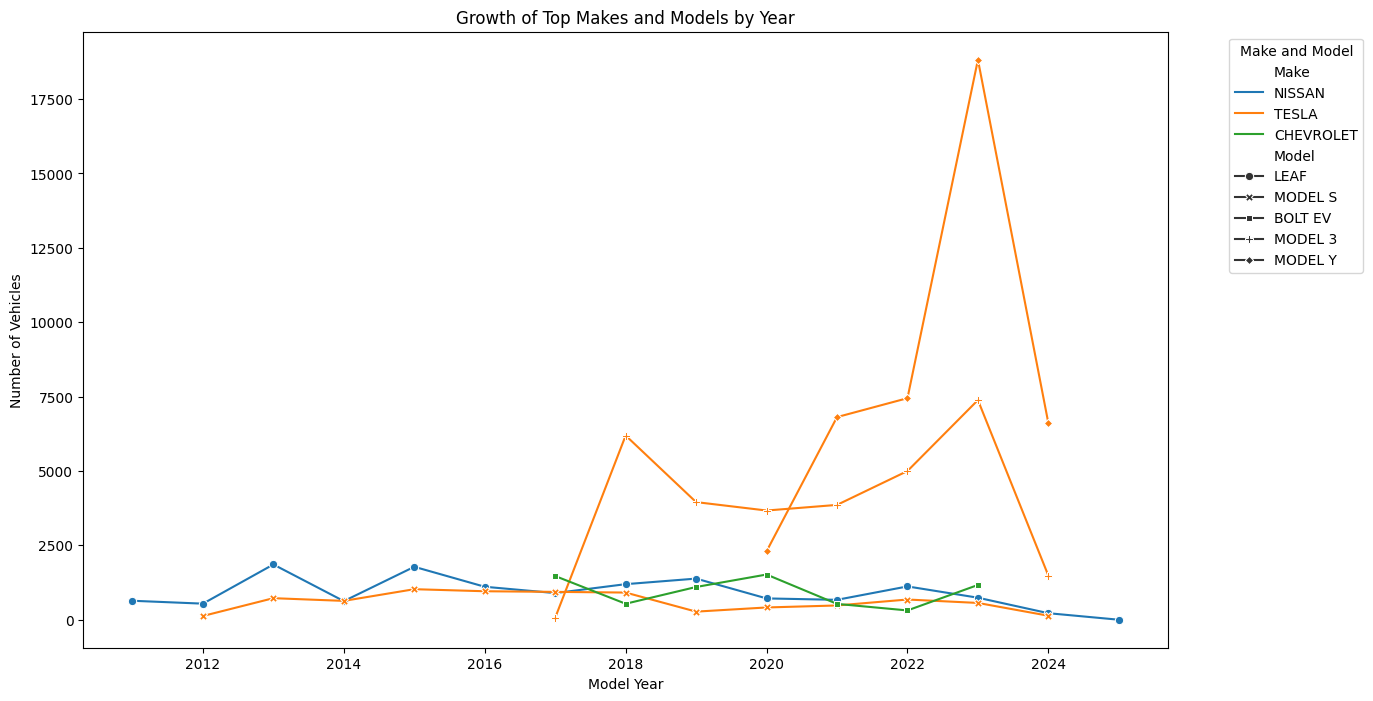

In [29]:
# Plot the growth of top makes and models over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=make_model_growth_top, x='Model Year', y='Count', hue='Make', style='Model', markers=True, dashes=False)
plt.title('Growth of Top Makes and Models by Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Make and Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Findings**

- Tesla's Model Y and Model 3 exhibit the most significant growth, with a sharp increase in registrations starting around 2019 and peaking in 2021. The Model Y shows the highest peak, indicating it is currently the most popular model.

- Other models like the Nissan Leaf, Tesla Model S, and Chevrolet Bolt EV show steadier growth with fewer fluctuations compared to Tesla’s newer models. The Nissan Leaf, in particular, has consistent registrations over the years but does not match the peaks of Tesla's models.

- There is a noticeable decline in the number of vehicles registered after the 2021 peak across all models. This could indicate market saturation, changes in consumer preferences, or a temporary slowdown in new vehicle registrations.

- Despite the overall decline, Tesla models continue to dominate the EV market, significantly outpacing other models in terms of growth and total numbers.

**To analyze the Base Manufacturer's Suggested Retail Price (MSRP) for each maker (brand).**

**Calculate the Average Base MSRP for Each Maker**

In [30]:
# Group by Make and calculate the average Base MSRP
average_msrp_by_make = df.groupby('Make')['Base MSRP'].mean().reset_index()

# Sort the results by Base MSRP in descending order to see the most expensive makers first
average_msrp_by_make = average_msrp_by_make.sort_values(by='Base MSRP', ascending=False)

# Display the results
print(average_msrp_by_make)


                    Make     Base MSRP
41  WHEEGO ELECTRIC CARS  32995.000000
26                  MINI   5724.925816
40                 VOLVO   3439.005736
11                FISKER   3431.351351
5                    BMW   3015.354473
19                   KIA   2128.440995
35                SUBARU   1979.151671
30               PORSCHE   1474.262295
8               CHRYSLER   1270.559392
6               CADILLAC    993.786127
36                 TESLA    920.694588
38                TOYOTA      0.000000
39            VOLKSWAGEN      0.000000
27            MITSUBISHI      0.000000
28                NISSAN      0.000000
29              POLESTAR      0.000000
33           ROLLS-ROYCE      0.000000
31                   RAM      0.000000
32                RIVIAN      0.000000
34                 SMART      0.000000
24                 MAZDA      0.000000
37                 TH!NK      0.000000
25         MERCEDES-BENZ      0.000000
0                  ACURA      0.000000
23                 LUCID 

**Visualize the Base MSRP for Each Maker**

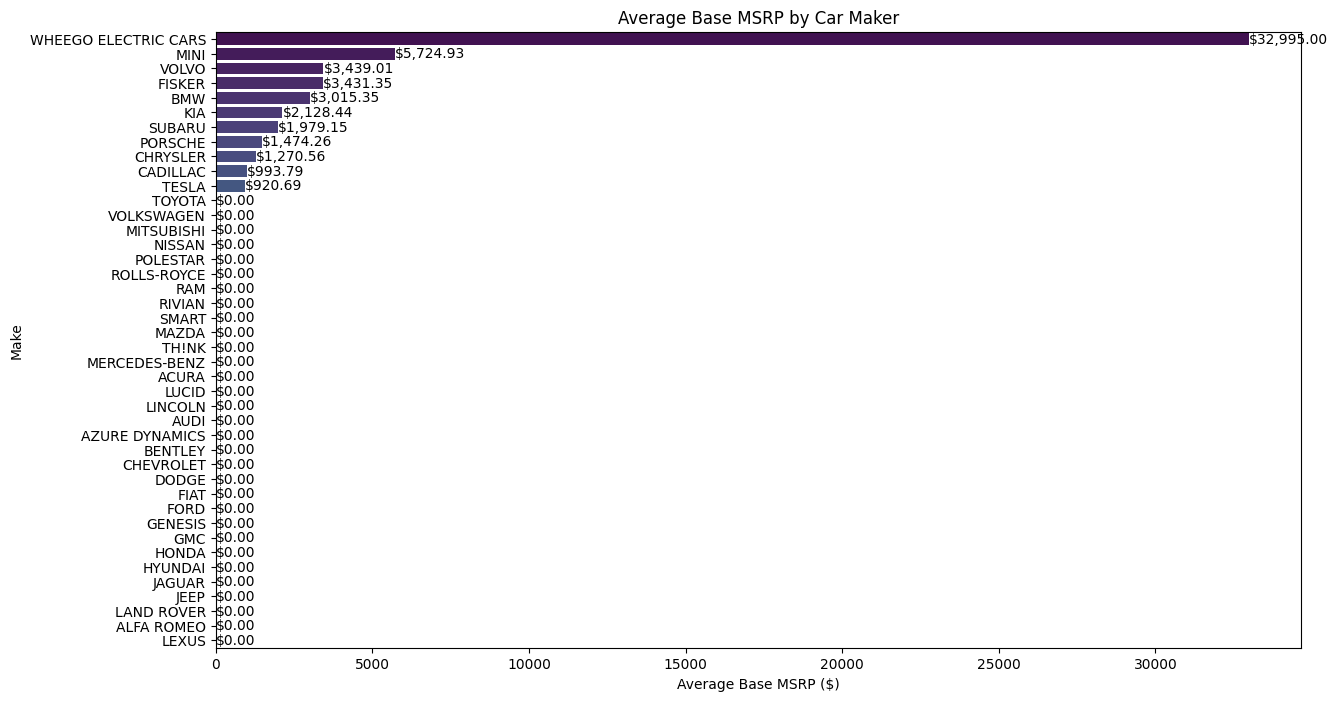

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the average Base MSRP by Make
plt.figure(figsize=(14, 8))
sns.barplot(x='Base MSRP', y='Make', data=average_msrp_by_make, palette='viridis')

# Add the exact values on top of the bars
for index, value in enumerate(average_msrp_by_make['Base MSRP']):
    plt.text(value, index, f'${value:,.2f}', va='center')

plt.title('Average Base MSRP by Car Maker')
plt.xlabel('Average Base MSRP ($)')
plt.ylabel('Make')
plt.show()



**Findings**

- WHEEGO ELECTRIC CARS brand shows the highest average base MSRP at $32,995.00, making it the most expensive among the listed brands.

- MINI, VOLVO, FISKER, BMW brands have significant average base MSRPs, with MINI leading this group at $5,724.93.
- The other brands range from $3,015.35 (BMW) to $3,439.01 (VOLVO).

- A large number of car makers, including popular brands like Tesla, Nissan, Ford, and Chevrolet, show an MSRP of $0. This might suggest that MSRP data for these brands is missing or was not included in the dataset.

- Interestingly, Tesla is listed with a very low average base MSRP of $920.69, which seems inconsistent with market prices, indicating a potential data issue or that only a specific subset of Tesla vehicles was considered.

**What is the distribution of Base MSRP across different regions (counties and cities)?**

**Calculate the Average Base MSRP by County**

In [34]:
# Group by County and calculate the average Base MSRP
average_msrp_by_county = df.groupby('County')['Base MSRP'].mean().reset_index()

# Sort the results by Base MSRP in descending order to see the most expensive counties first
average_msrp_by_county = average_msrp_by_county.sort_values(by='Base MSRP', ascending=False)

# Display the results
print(average_msrp_by_county)


           County  Base MSRP
182        Travis    52900.0
3       Albemarle    52900.0
170  Spotsylvania    52900.0
146   Rock Island    39995.0
114     Multnomah    26450.0
..            ...        ...
74       Honolulu        0.0
75        Houston        0.0
76         Howard        0.0
77         Hudson        0.0
198          Yuba        0.0

[199 rows x 2 columns]


**Average Base MSRP by City**

In [35]:
# Group by City and calculate the average Base MSRP
average_msrp_by_city = df.groupby('City')['Base MSRP'].mean().reset_index()

# Sort the results by Base MSRP in descending order to see the most expensive cities first
average_msrp_by_city = average_msrp_by_city.sort_values(by='Base MSRP', ascending=False)

# Display the results
print(average_msrp_by_city)


                City  Base MSRP
292      Hughesville    52900.0
105  Charlottesville    52900.0
459  North Las Vegas    52900.0
344          Leander    52900.0
513        Pittsburg    44100.0
..               ...        ...
337        Lancaster        0.0
50          Berkeley        0.0
339          Lansing        0.0
340       Las Cruces        0.0
420        Montesano        0.0

[763 rows x 2 columns]


**Visualize the Distribution Using Box Plots**

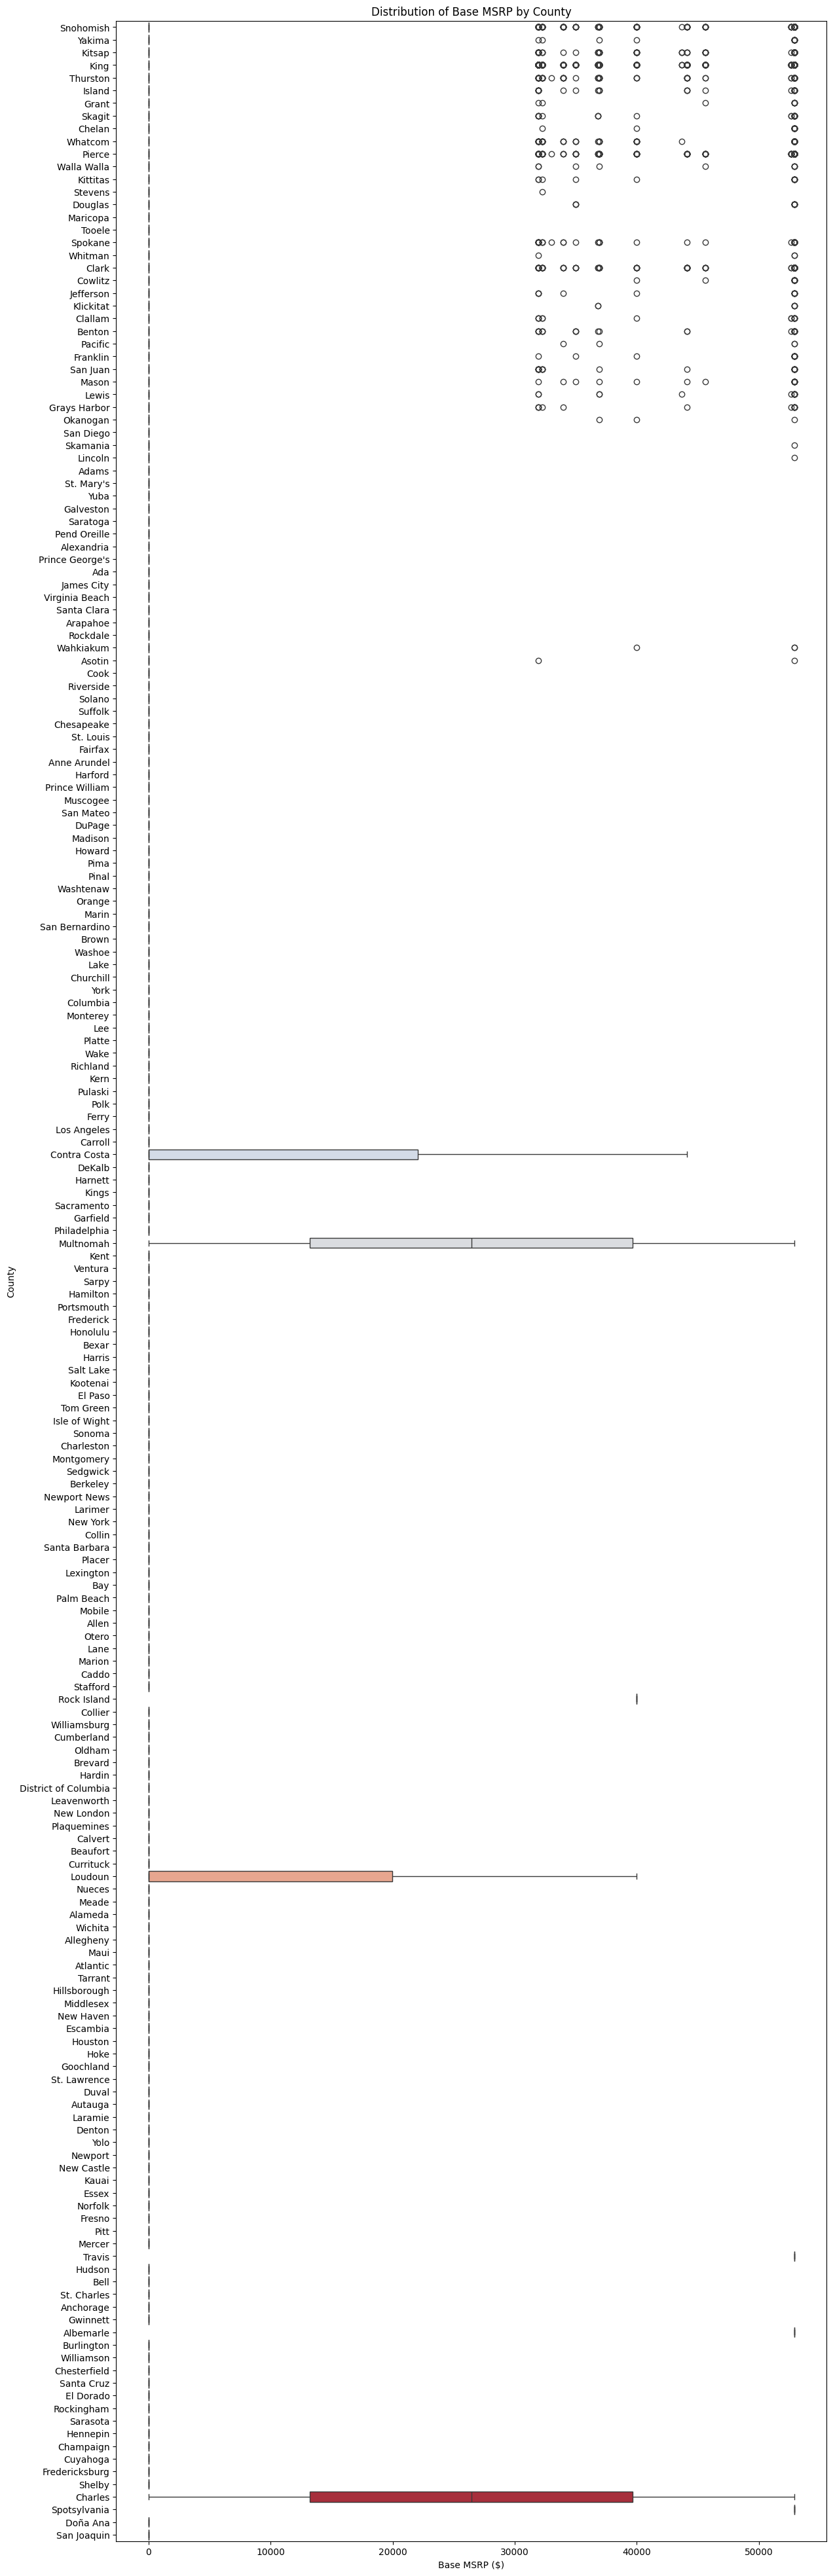

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Base MSRP by County
plt.figure(figsize=(14, 50))
sns.boxplot(x='Base MSRP', y='County', data=df, palette='coolwarm')
plt.title('Distribution of Base MSRP by County')
plt.xlabel('Base MSRP ($)')
plt.ylabel('County')
plt.show()


**Findings**

- The chart shows a significant variation in the base MSRP across different counties, indicating that the price points for electric vehicles (EVs) can differ substantially depending on the region.

- Some counties have higher average MSRPs, with Los Angeles and another county standing out with particularly high ranges, suggesting that more expensive EV models might be more popular or more available in these areas.

- Other counties show much lower base MSRPs, indicating a preference or availability of less expensive EV models.

- There are some outliers in the data, which could represent either very high-end models or data points with incorrect or exceptional pricing.

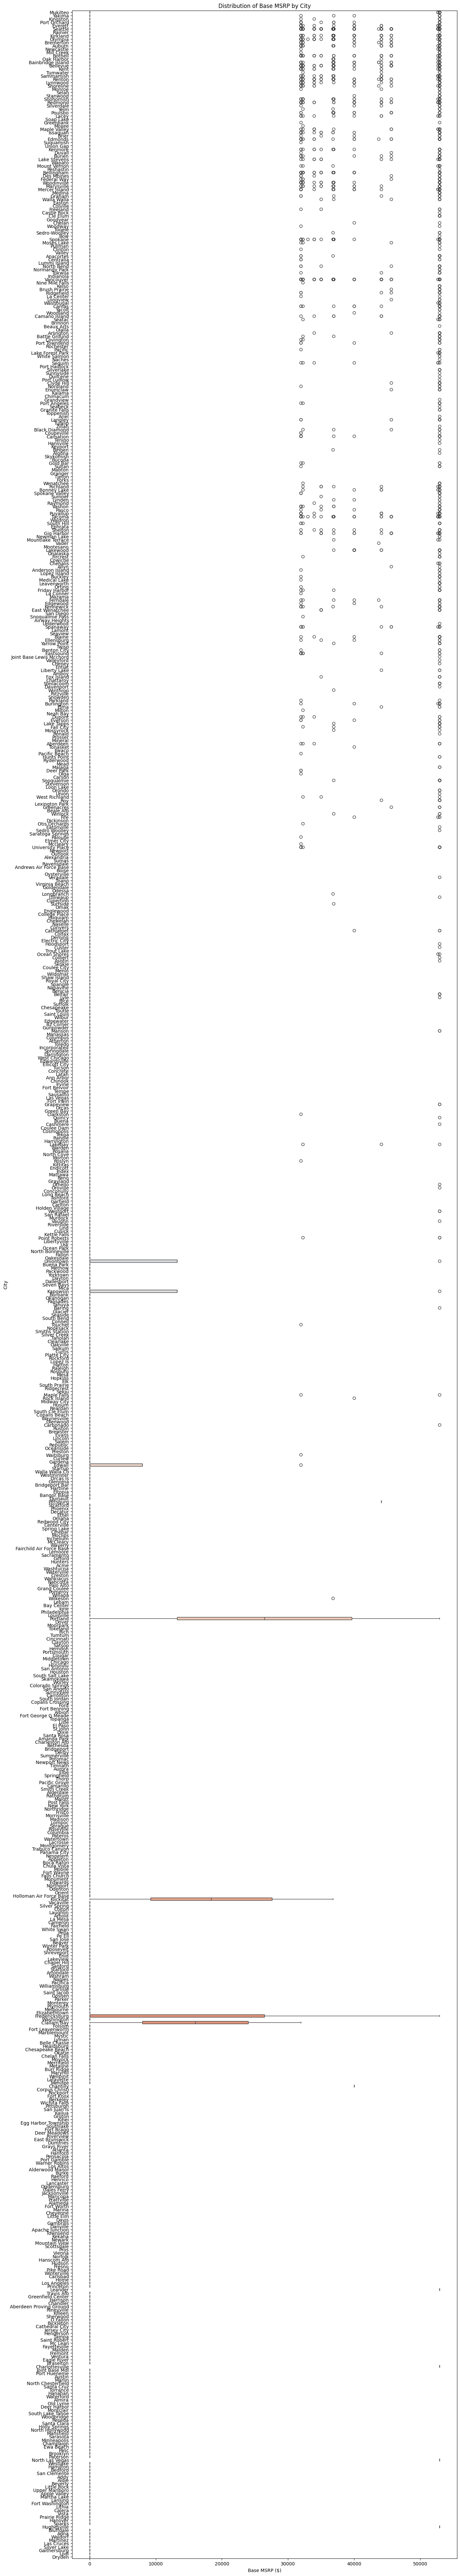

In [42]:
# Plot the distribution of Base MSRP by City
plt.figure(figsize=(15, 100))
sns.boxplot(x='Base MSRP', y='City', data=df, palette='coolwarm')
plt.title('Distribution of Base MSRP by City')
plt.xlabel('Base MSRP ($)')
plt.ylabel('City')
plt.show()


**Findings**

- The chart reveals significant variations in the base MSRP across different cities, indicating that the price points for electric vehicles (EVs) can differ substantially depending on the city.

- Some cities have notably higher average MSRPs, with a few standing out with particularly high ranges. This suggests that more expensive EV models might be more popular or more available in these areas.

- Many cities display lower base MSRPs, indicating a preference or availability of less expensive EV models.

- There are outliers in the data, representing either very high-end models or potentially incorrect or exceptional pricing data.

**Is there a relationship between Base MSRP and the type of EV (BEV vs. PHEV)?**

**Compare the Average Base MSRP between BEVs and PHEVs**

In [43]:
# Group by Electric Vehicle Type and calculate the average Base MSRP
average_msrp_by_ev_type = df.groupby('Electric Vehicle Type')['Base MSRP'].mean().reset_index()

# Display the results
print(average_msrp_by_ev_type)


                    Electric Vehicle Type    Base MSRP
0          Battery Electric Vehicle (BEV)   635.513405
1  Plug-in Hybrid Electric Vehicle (PHEV)  1325.515921


**Visualize the Distribution of Base MSRP for BEVs and PHEVs**

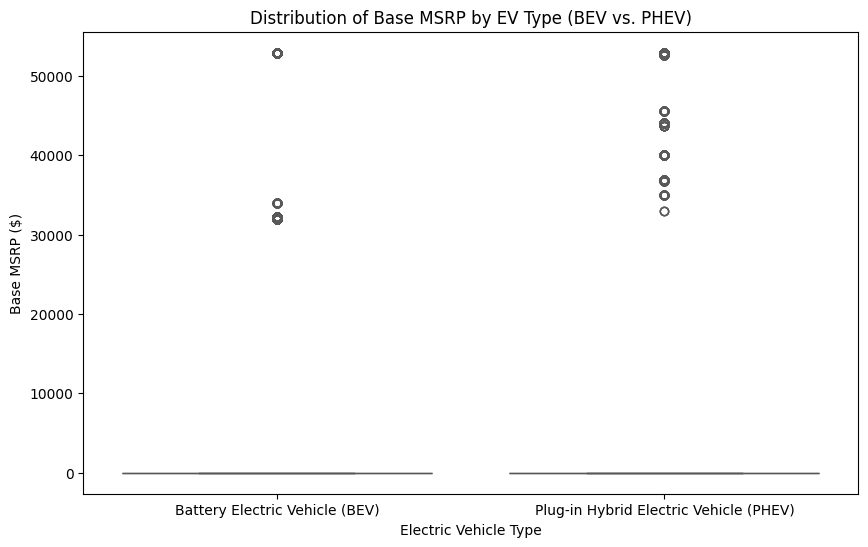

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Base MSRP for BEVs vs. PHEVs
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df, palette='Set2')
plt.title('Distribution of Base MSRP by EV Type (BEV vs. PHEV)')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP ($)')
plt.show()


**Findings**

- Both BEVs and PHEVs show the presence of significant outliers in their base MSRP. These outliers indicate that there are a few very high-priced vehicles in both categories.

- The bulk of the data for both BEVs and PHEVs is clustered near the lower end of the MSRP scale, suggesting that most vehicles in both categories have a relatively low base price.

- The PHEVs appear to have slightly more high-priced outliers compared to BEVs, although the difference is not drastic.

- The main body of the MSRP data for both BEVs and PHEVs is tightly clustered at the lower end, indicating that most of these vehicles are priced similarly.



**How does Electric Range vary across different makes and models?**

In [45]:
# Group by Make and Model, then calculate the average Electric Range
average_range_by_make_model = df.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()

# Sort the results by Electric Range in descending order to see the models with the highest range first
average_range_by_make_model = average_range_by_make_model.sort_values(by='Electric Range', ascending=False)

# Display the results
print(average_range_by_make_model)


          Make      Model  Electric Range
69     HYUNDAI       KONA      258.000000
134      TESLA   ROADSTER      228.958333
74      JAGUAR     I-PACE      204.504202
131      TESLA    MODEL S      173.128495
37   CHEVROLET    BOLT EV      170.613277
..         ...        ...             ...
96       MAZDA      MX-30        0.000000
34    CADILLAC      LYRIQ        0.000000
93       LUCID        AIR        0.000000
35   CHEVROLET  BLAZER EV        0.000000
0        ACURA        ZDX        0.000000

[151 rows x 3 columns]


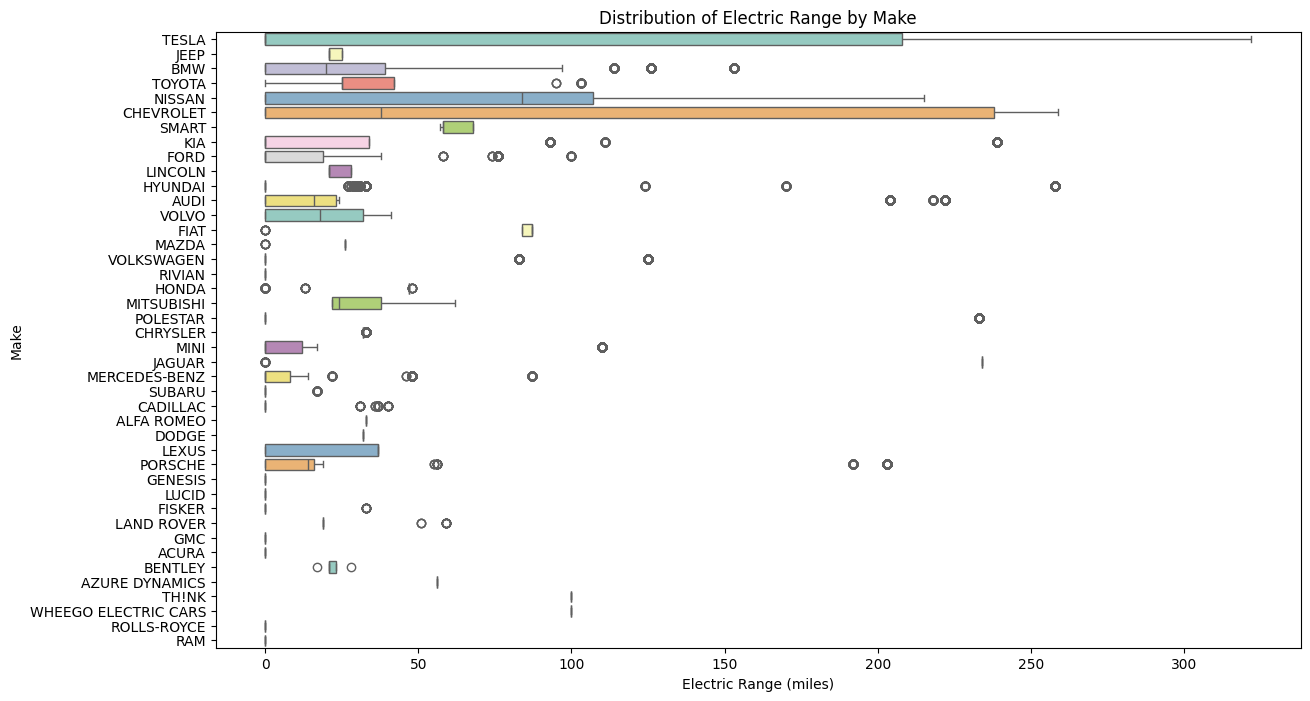

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Electric Range by Make
plt.figure(figsize=(14, 8))
sns.boxplot(x='Electric Range', y='Make', data=df, palette='Set3')
plt.title('Distribution of Electric Range by Make')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Make')
plt.show()


**Findings**

- Tesla vehicles have the highest range among all car makes, with most of their vehicles offering well above 200 miles of electric range. Tesla's box plot is also the longest, indicating that its models span a wide range of electric mileages, with some outliers exceeding 300 miles.

- Chevrolet and Nissan also offer vehicles with a relatively high range, with many models clustered around 100-200 miles. These makes appear to be the next most competitive in terms of electric range after Tesla.

- Other car makers, such as BMW, Ford, and Audi, offer vehicles with a range of 50-150 miles, indicating more variability in their electric vehicle offerings.

- Several makes, such as SMART, MINI, and FIAT, have vehicles with much lower electric ranges, generally below 50 miles. These vehicles likely cater to urban drivers with shorter commutes.

- Many makes show a number of outliers indicating the presence of models with significantly higher or lower ranges than the median. This suggests diversity within the makes in terms of their vehicle offerings.

**Are vehicles with a higher Electric Range more popular in certain regions?**

**Segment the Data into Electric Range Categories**

In [47]:
# Define Electric Range categories
bins = [0, 100, 200, 300, 400, 500, 1000]  # Adjust the bins based on your data
labels = ['0-100 miles', '101-200 miles', '201-300 miles', '301-400 miles', '401-500 miles', '500+ miles']

# Create a new column for Electric Range Category
df['Range Category'] = pd.cut(df['Electric Range'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(df[['Electric Range', 'Range Category']].head())


   Electric Range Range Category
0             270  201-300 miles
1              21    0-100 miles
2             153  101-200 miles
3              25    0-100 miles
4              30    0-100 miles


**Calculate the Popularity of Each Range Category by Region**

Popularity by County

In [48]:
# Group by County and Range Category to count the number of vehicles in each category per county
range_popularity_by_county = df.groupby(['County', 'Range Category']).size().reset_index(name='Count')

# Display the results
print(range_popularity_by_county)


     County Range Category  Count
0       Ada    0-100 miles      2
1       Ada  101-200 miles      0
2       Ada  201-300 miles      0
3       Ada  301-400 miles      0
4       Ada  401-500 miles      0
...     ...            ...    ...
1189   Yuba  101-200 miles      0
1190   Yuba  201-300 miles      0
1191   Yuba  301-400 miles      0
1192   Yuba  401-500 miles      0
1193   Yuba     500+ miles      0

[1194 rows x 3 columns]


Popularity by City

In [49]:
# Group by City and Range Category to count the number of vehicles in each category per city
range_popularity_by_city = df.groupby(['City', 'Range Category']).size().reset_index(name='Count')

# Display the results
print(range_popularity_by_city)


          City Range Category  Count
0     Aberdeen    0-100 miles    144
1     Aberdeen  101-200 miles      8
2     Aberdeen  201-300 miles     31
3     Aberdeen  301-400 miles      1
4     Aberdeen  401-500 miles      0
...        ...            ...    ...
4573    Zillah  101-200 miles      0
4574    Zillah  201-300 miles      6
4575    Zillah  301-400 miles      2
4576    Zillah  401-500 miles      0
4577    Zillah     500+ miles      0

[4578 rows x 3 columns]


**Visualize the Distribution to See Regional Preferences**

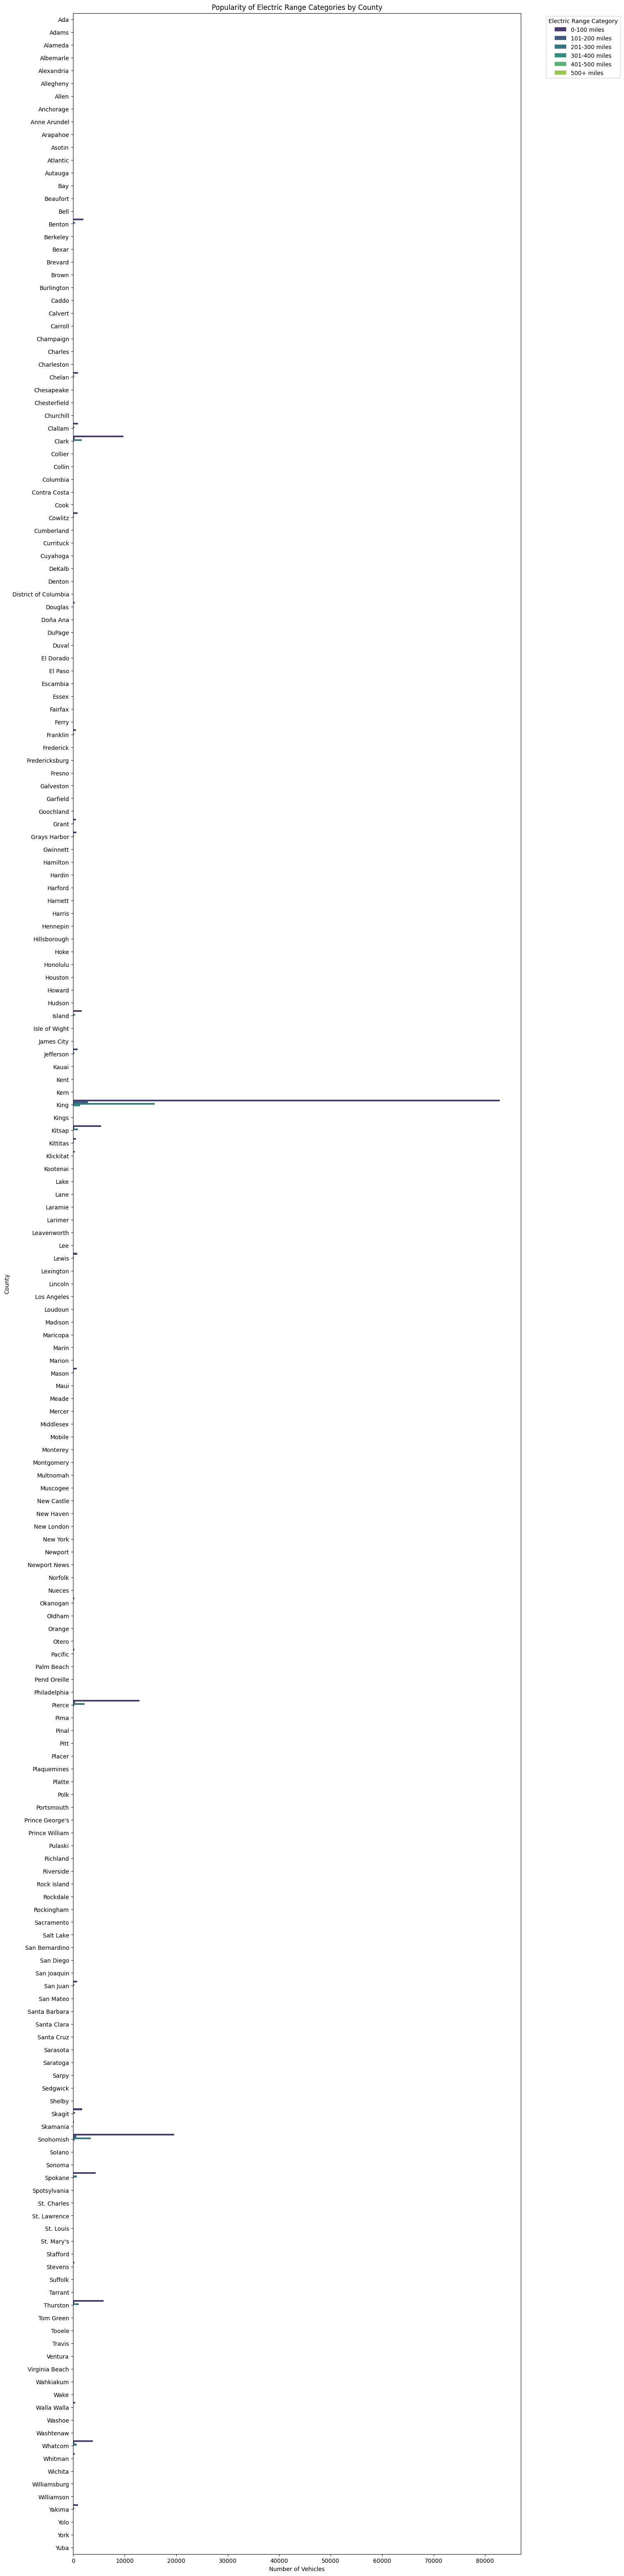

In [51]:
# Visualize Popularity by County

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Electric Range categories by County
plt.figure(figsize=(14, 80))
sns.barplot(x='Count', y='County', hue='Range Category', data=range_popularity_by_county, palette='viridis')
plt.title('Popularity of Electric Range Categories by County')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.legend(title='Electric Range Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Findings**

- The counties with the highest number of vehicles, particularly King County, show a strong preference for vehicles with a range of 300+ miles. This suggests that in more populous or affluent counties, consumers are opting for longer-range EVs, which are likely more expensive and offer more convenience for longer trips.

- In some counties, there are noticeable counts of vehicles in the lower range categories (0-100 miles and 101-200 miles). This indicates that in certain regions, possibly where EV adoption is just beginning or where driving distances are typically shorter, consumers are opting for more affordable, shorter-range vehicles.

- Many counties show little to no adoption across all range categories. This could be due to lower overall EV adoption in these regions, possibly influenced by factors such as lack of infrastructure, economic factors, or lower consumer awareness.

- A few counties, like King, Snohomish, and Pierce, have a much higher number of vehicles across multiple range categories, highlighting their role as major hubs of EV adoption within the state.

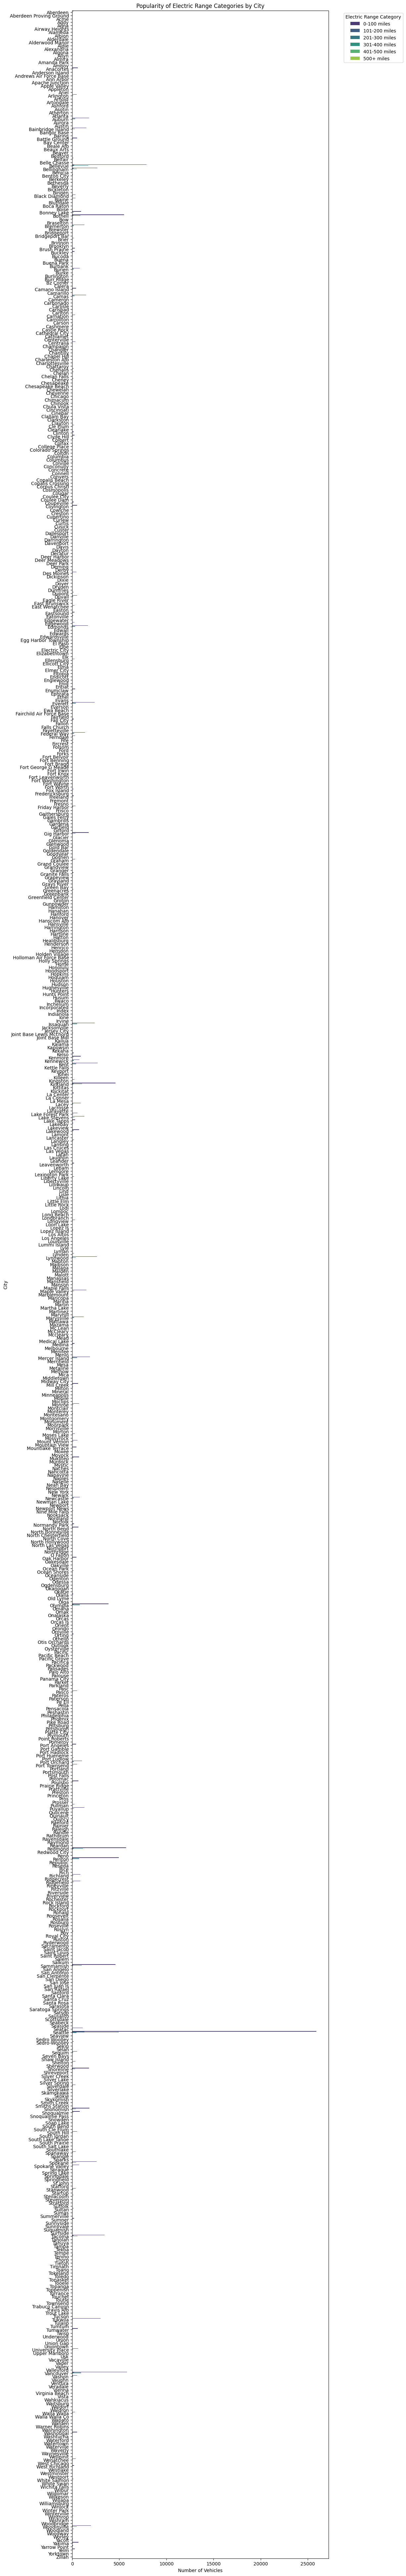

In [54]:
# Visualize Popularity by City

# Plot the distribution of Electric Range categories by City (for top cities)
plt.figure(figsize=(10, 100))
sns.barplot(x='Count', y='City', hue='Range Category', data=range_popularity_by_city, palette='viridis')
plt.title('Popularity of Electric Range Categories by City')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.legend(title='Electric Range Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Findings**

- The majority of cities with significant EV adoption show a strong preference for vehicles with a range of 300+ miles. This aligns with the trend seen in counties where longer-range vehicles are more popular in urban and affluent areas.

- Some cities show notable adoption of EVs in the lower range categories (0-100 miles and 101-200 miles). This could indicate early-stage adoption in these cities, where consumers might be opting for more affordable EV options, or where shorter driving distances make lower-range EVs practical.

- A large number of cities show very low or no adoption across all range categories. This suggests that EV adoption is still limited in many smaller or rural cities, potentially due to lack of infrastructure, economic factors, or lower awareness of EV options.

- Cities with higher adoption levels across multiple range categories stand out, highlighting these areas as significant hubs for EV usage. This trend is consistent with what has been observed in the county-level analysis.

**How does Clean Alternative Fuel Vehicle (CAFV) Eligibility affect consumer choices?**


**To analyze how Clean Alternative Fuel Vehicle (CAFV) Eligibility affects consumer choices, I'll focus on the top 20 counties and top 20 cities by the number of vehicles.**

In [55]:
# Identify the Top 20 Counties and Cities

# Group by County and count the number of vehicles
vehicle_count_by_county = df.groupby('County').size().reset_index(name='Total Vehicles')

# Sort and get the top 20 counties
top_20_counties = vehicle_count_by_county.sort_values(by='Total Vehicles', ascending=False).head(20)

# Filter the dataset to include only these top 20 counties
df_top_20_counties = df[df['County'].isin(top_20_counties['County'])]

# Display the top 20 counties
print(top_20_counties)


           County  Total Vehicles
85           King          102837
166     Snohomish           23933
132        Pierce           15739
33          Clark           11872
179      Thurston            7297
87         Kitsap            6686
169       Spokane            5261
190       Whatcom            4829
16         Benton            2482
164        Skagit            2171
78         Island            2141
28         Chelan            1207
195        Yakima            1189
32        Clallam            1184
81      Jefferson            1099
39        Cowlitz            1039
154      San Juan            1010
106         Mason             931
97          Lewis             897
64   Grays Harbor             731


In [56]:
# Top 20 Cities by Vehicle Count

# Group by City and count the number of vehicles
vehicle_count_by_city = df.groupby('City').size().reset_index(name='Total Vehicles')

# Sort and get the top 20 cities
top_20_cities = vehicle_count_by_city.sort_values(by='Total Vehicles', ascending=False).head(20)

# Filter the dataset to include only these top 20 cities
df_top_20_cities = df[df['City'].isin(top_20_cities['City'])]

# Display the top 20 cities
print(top_20_cities)


              City  Total Vehicles
605        Seattle           32602
46        Bellevue            9960
550        Redmond            7165
707      Vancouver            7081
61         Bothell            6602
321       Kirkland            5883
553         Renton            5835
585      Sammamish            5795
477        Olympia            4830
666         Tacoma            4204
47      Bellingham            3325
315           Kent            3229
691        Tukwila            3118
373       Lynnwood            3116
644        Spokane            3104
303       Issaquah            3037
207        Everett            2874
753    Woodinville            2595
403  Mercer Island            2543
628      Snohomish            2321


In [57]:
# Analyze the Distribution of CAFV-Eligible vs. Non-Eligible Vehicles

# Distribution in Top 20 Counties

# Group by County and CAFV Eligibility, then count the number of vehicles
cafv_distribution_by_county = df_top_20_counties.groupby(['County', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().reset_index(name='Count')

# Display the results
print(cafv_distribution_by_county)


          County  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Count
0         Benton            Clean Alternative Fuel Vehicle Eligible   1026
1         Benton  Eligibility unknown as battery range has not b...   1133
2         Benton              Not eligible due to low battery range    323
3         Chelan            Clean Alternative Fuel Vehicle Eligible    478
4         Chelan  Eligibility unknown as battery range has not b...    616
5         Chelan              Not eligible due to low battery range    113
6        Clallam            Clean Alternative Fuel Vehicle Eligible    511
7        Clallam  Eligibility unknown as battery range has not b...    511
8        Clallam              Not eligible due to low battery range    162
9          Clark            Clean Alternative Fuel Vehicle Eligible   4344
10         Clark  Eligibility unknown as battery range has not b...   6030
11         Clark              Not eligible due to low battery range   1498
12       Cowlitz         

In [58]:
# Distribution in Top 20 Cities

# Group by City and CAFV Eligibility, then count the number of vehicles
cafv_distribution_by_city = df_top_20_cities.groupby(['City', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().reset_index(name='Count')

# Display the results
print(cafv_distribution_by_city)


             City  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Count
0        Bellevue            Clean Alternative Fuel Vehicle Eligible   3087
1        Bellevue  Eligibility unknown as battery range has not b...   6206
2        Bellevue              Not eligible due to low battery range    667
3      Bellingham            Clean Alternative Fuel Vehicle Eligible   1483
4      Bellingham  Eligibility unknown as battery range has not b...   1441
5      Bellingham              Not eligible due to low battery range    401
6         Bothell            Clean Alternative Fuel Vehicle Eligible   1799
7         Bothell  Eligibility unknown as battery range has not b...   4409
8         Bothell              Not eligible due to low battery range    394
9         Everett            Clean Alternative Fuel Vehicle Eligible    953
10        Everett  Eligibility unknown as battery range has not b...   1638
11        Everett              Not eligible due to low battery range    283
12       Iss

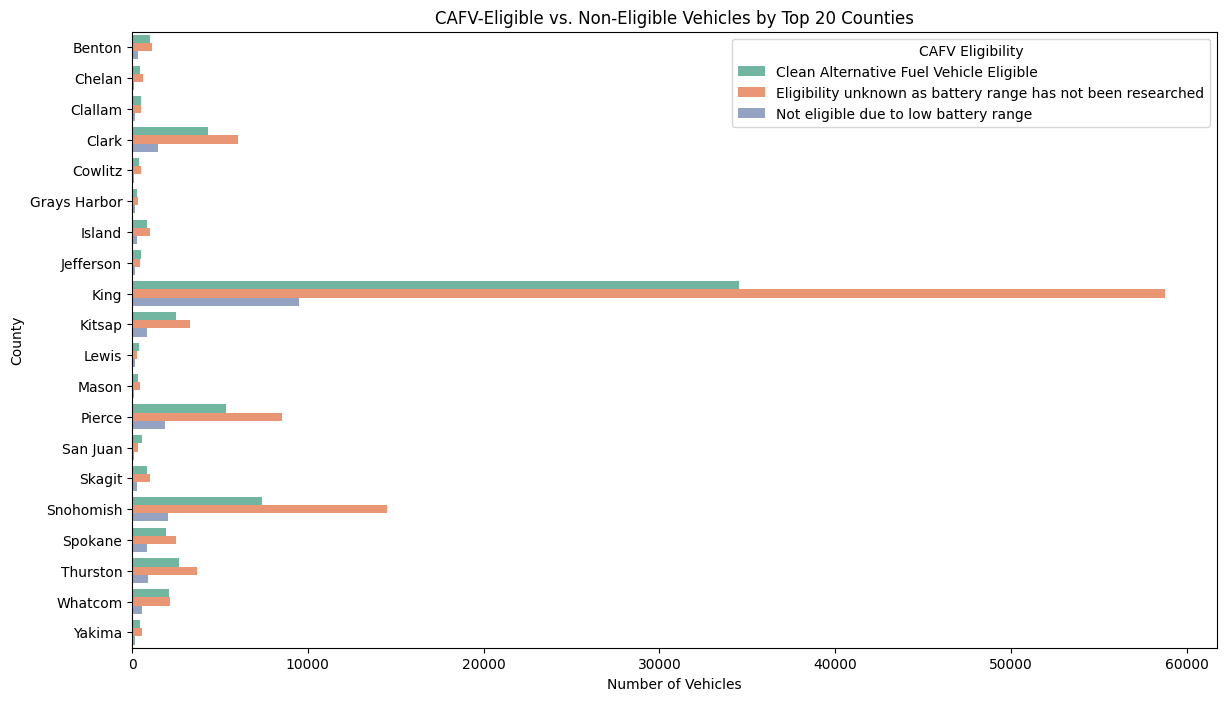

In [59]:
# Visualize the Results Using Bar Charts

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of CAFV-eligible vs. non-eligible vehicles by County
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='County', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=cafv_distribution_by_county, palette='Set2')
plt.title('CAFV-Eligible vs. Non-Eligible Vehicles by Top 20 Counties')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.legend(title='CAFV Eligibility')
plt.show()


**Findings**

- King County has the highest number of CAFV-eligible vehicles by a significant margin, indicating that a large portion of its electric vehicle fleet meets the criteria for clean alternative fuel vehicles.
- However, King County also has a considerable number of vehicles where eligibility is unknown, suggesting that further research or data collection may be needed to fully understand the CAFV potential in this county.
-Counties such as Snohomish, Pierce, and Clark also show a reasonable number of CAFV-eligible vehicles, reflecting their urban nature and more extensive EV adoption.
- These counties also have a significant number of vehicles where eligibility is unknown, which might indicate a similar need for more detailed data.
- Rural counties like Grays Harbor, Island, and Clallam have much lower numbers of CAFV-eligible vehicles, which is consistent with the overall lower adoption of EVs in these areas.
- The presence of non-eligible vehicles due to low battery range is also more noticeable in these counties, likely reflecting the older or less advanced EVs that may be more prevalent in rural areas.
- Across several counties, there is a significant proportion of vehicles where CAFV eligibility is unknown, mainly due to the lack of information on battery range.

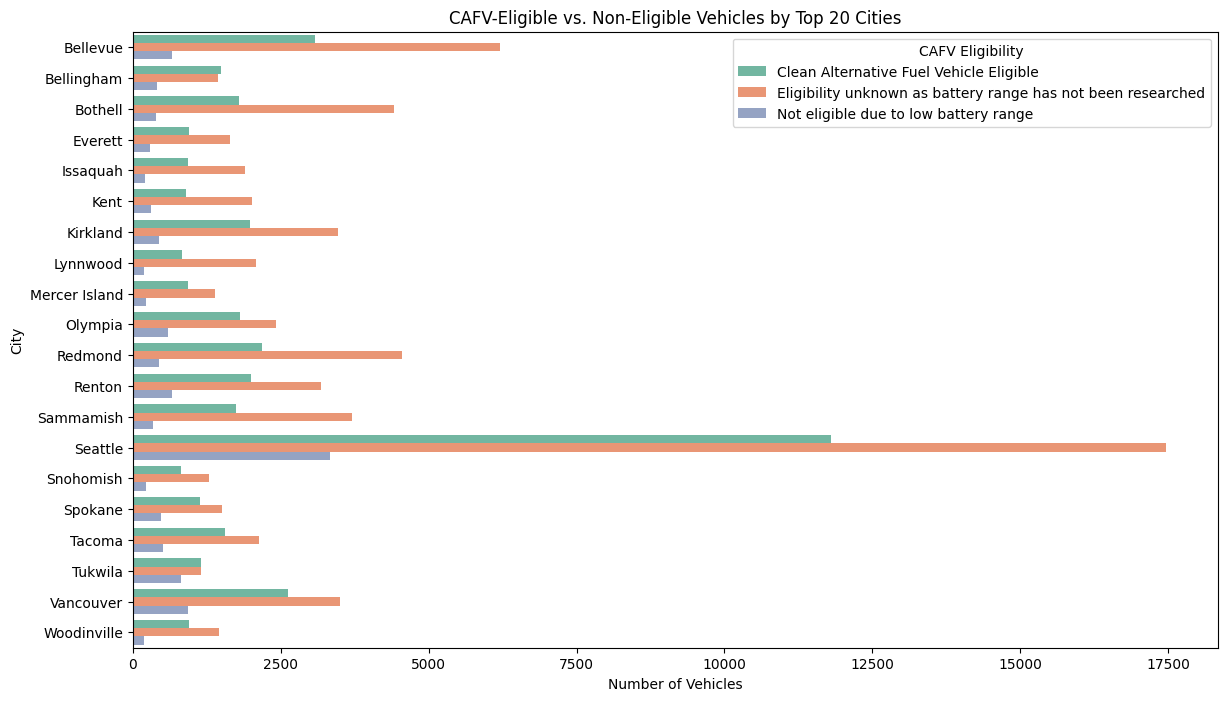

In [60]:
# Plot the distribution of CAFV-eligible vs. non-eligible vehicles by City
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='City', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=cafv_distribution_by_city, palette='Set2')
plt.title('CAFV-Eligible vs. Non-Eligible Vehicles by Top 20 Cities')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.legend(title='CAFV Eligibility')
plt.show()


**Findings**

- Seattle has the highest number of CAFV-eligible vehicles, which aligns with its overall leadership in EV adoption. However, Seattle also has a large number of vehicles where eligibility is unknown, indicating a need for further investigation to determine the full potential for CAFV.

- Across most cities, there is a notable portion of vehicles where the eligibility is unknown due to the lack of data on battery range. This is especially prominent in cities like Bellevue, Bothell, and Sammamish. Addressing this data gap could provide clearer insights into the potential for CAFV expansion.

- Cities such as Bellevue, Redmond, and Kirkland show a moderate number of CAFV-eligible vehicles, reflecting their suburban nature and significant EV adoption rates. These cities also have a considerable number of vehicles with unknown eligibility, similar to the trend observed in Seattle.

- Smaller cities like Tukwila, Woodinville, and Mercer Island have fewer CAFV-eligible vehicles. The lower overall EV adoption in these areas likely contributes to this trend.

**Is there a correlation between CAFV Eligibility and Base MSRP or Electric Range?**

**Analyze the Relationship Between CAFV Eligibility and Base MSRP**

In [61]:
# Group by CAFV Eligibility and calculate the mean Base MSRP
msrp_summary_by_cafv = df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Base MSRP'].describe()

# Display the summary statistics
print(msrp_summary_by_cafv)


                                                       count         mean  \
Clean Alternative Fuel Vehicle (CAFV) Eligibility                           
Clean Alternative Fuel Vehicle Eligible              69618.0  1519.233675   
Eligibility unknown as battery range has not be...  109400.0     0.000000   
Not eligible due to low battery range                21022.0  2430.450005   

                                                             std  min  25%  \
Clean Alternative Fuel Vehicle (CAFV) Eligibility                            
Clean Alternative Fuel Vehicle Eligible              8464.943661  0.0  0.0   
Eligibility unknown as battery range has not be...      0.000000  0.0  0.0   
Not eligible due to low battery range               10629.955856  0.0  0.0   

                                                    50%  75%      max  
Clean Alternative Fuel Vehicle (CAFV) Eligibility                      
Clean Alternative Fuel Vehicle Eligible             0.0  0.0  52900.0  
Eligibi

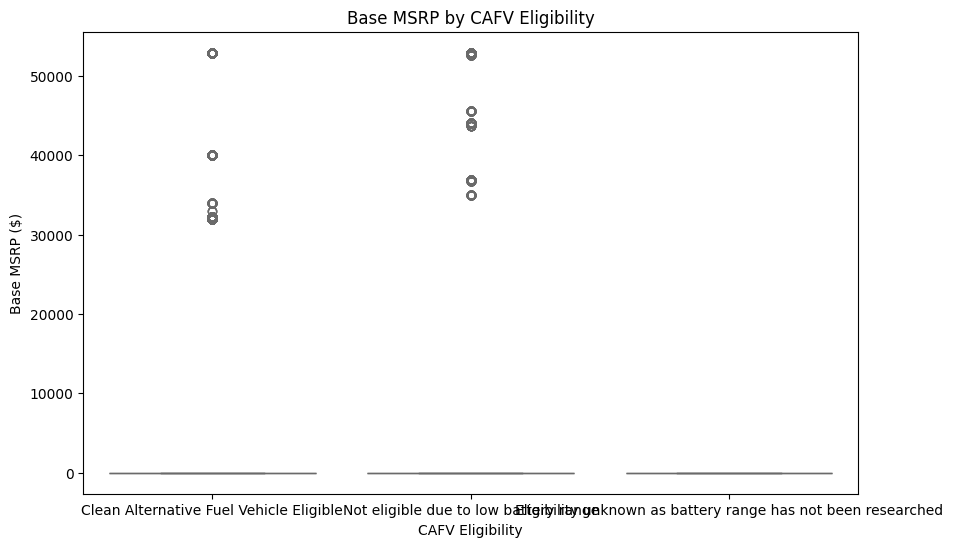

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of Base MSRP by CAFV Eligibility
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Base MSRP', data=df, palette='Set3')
plt.title('Base MSRP by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Base MSRP ($)')
plt.show()


**Findings**

- The higher base MSRP vehicles (over $30,000) are distributed across all three categories of CAFV eligibility, including Clean Alternative Fuel Vehicle Eligible, Not Eligible, and Eligibility Unknown.

- The most expensive vehicles tend to cluster around $40,000 to $50,000 across all eligibility categories.

- A significant portion of the vehicles across all eligibility categories has a base MSRP near zero or very low, which could indicate the presence of data inaccuracies or incomplete pricing information in the dataset.

- There is no clear differentiation in MSRP between CAFV-eligible vehicles and those that are either not eligible or have unknown eligibility. This suggests that base price does not necessarily correlate with a vehicle's eligibility for Clean Alternative Fuel Vehicle incentives.

Analyze the Relationship Between CAFV Eligibility and Electric Range

In [63]:
# Group by CAFV Eligibility and calculate the mean Electric Range
range_summary_by_cafv = df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].describe()

# Display the summary statistics
print(range_summary_by_cafv)


                                                       count        mean  \
Clean Alternative Fuel Vehicle (CAFV) Eligibility                          
Clean Alternative Fuel Vehicle Eligible              69618.0  147.502858   
Eligibility unknown as battery range has not be...  109400.0    0.000000   
Not eligible due to low battery range                21022.0   20.276234   

                                                          std   min   25%  \
Clean Alternative Fuel Vehicle (CAFV) Eligibility                           
Clean Alternative Fuel Vehicle Eligible             94.579708  30.0  47.0   
Eligibility unknown as battery range has not be...   0.000000   0.0   0.0   
Not eligible due to low battery range                4.983894   6.0  18.0   

                                                      50%    75%    max  
Clean Alternative Fuel Vehicle (CAFV) Eligibility                        
Clean Alternative Fuel Vehicle Eligible             150.0  220.0  322.0  
Eligibility

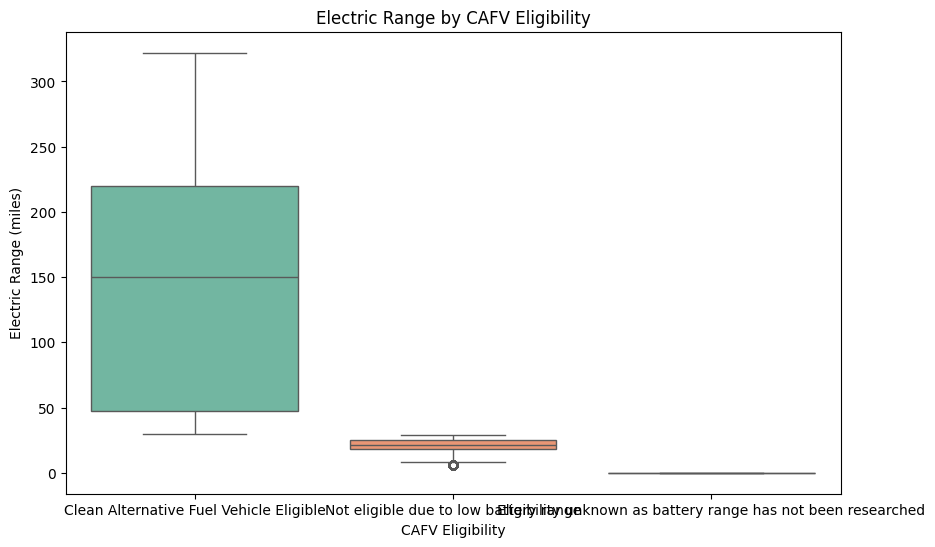

In [64]:
# Box plot of Electric Range by CAFV Eligibility
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=df, palette='Set2')
plt.title('Electric Range by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range (miles)')
plt.show()


**Findings**

- Vehicles that are eligible for Clean Alternative Fuel Vehicle incentives have the highest median and overall electric range. The median electric range for these vehicles is around 150 miles, with the interquartile range extending from about 100 to over 200 miles. Some vehicles in this category even exceed 300 miles.

- Vehicles that are not eligible due to low battery range have a very limited electric range, with a median of around 20 miles and a narrow range between 0 to 50 miles. This category is clearly distinct from the CAFV eligible vehicles in terms of electric range.

- Vehicles with unknown eligibility due to unresearched battery range generally have very low electric ranges, similar to those not eligible. This could indicate that these vehicles are either older models or have incomplete data regarding their electric capabilities.

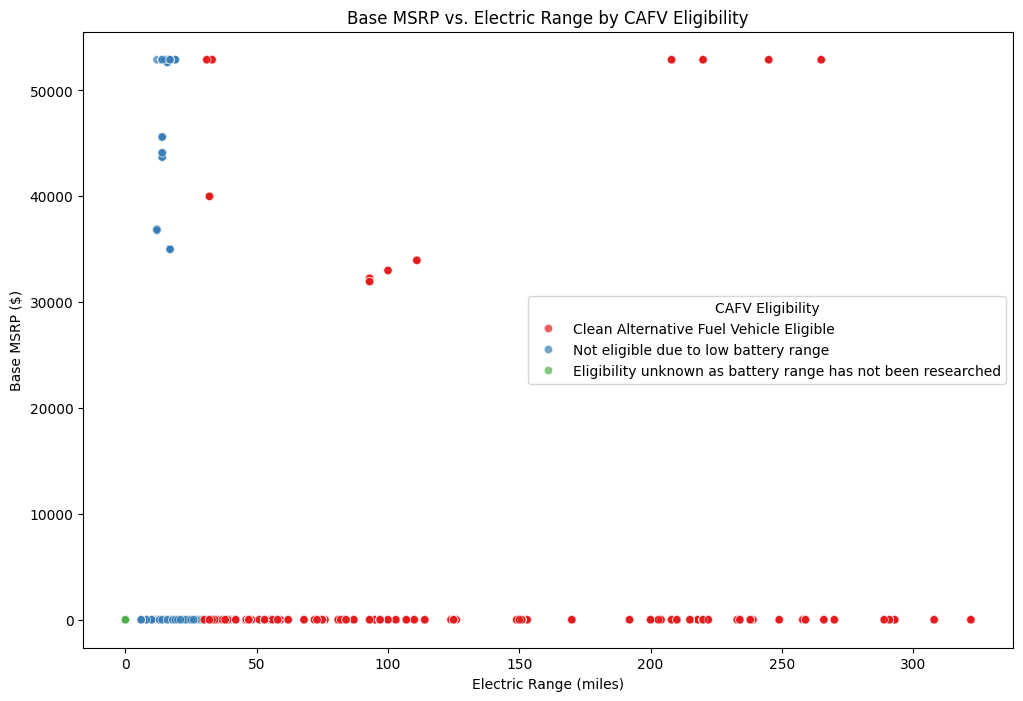

In [65]:
# Scatter plot of Base MSRP vs. Electric Range, colored by CAFV Eligibility
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Electric Range', y='Base MSRP', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=df, palette='Set1', alpha=0.7)
plt.title('Base MSRP vs. Electric Range by CAFV Eligibility')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='CAFV Eligibility')
plt.show()


**Findings**

- Vehicles that are eligible for CAFV incentives (represented in red) tend to have higher base MSRPs, especially as the electric range increases. For ranges around 200 miles and above, the base MSRP is concentrated between $40,000 and $50,000.

- Vehicles that are not eligible due to low battery range (represented in blue) generally have lower electric ranges (below 100 miles). These vehicles also show a high base MSRP, suggesting that high cost does not necessarily correlate with high electric range for non-eligible vehicles.

- Vehicles with unknown eligibility due to unresearched battery range (represented in green) typically have very low electric ranges and base MSRPs close to zero, indicating that these may be older models or data with incomplete entries.

- There is a distinct clustering of vehicles with low electric ranges (under 50 miles) and low base MSRPs. This cluster includes a mix of both eligible and non-eligible vehicles, showing that lower-end vehicles with shorter ranges are common in the market.

# **Insights and Recommendations**

1. Distribution of BEVs vs. PHEVs
Insight:
- Battery Electric Vehicles (BEVs) dominate the market with over 150,000 vehicles registered, compared to around 50,000 Plug-in Hybrid Electric Vehicles (PHEVs).

Recommendation:
- Focusing on expanding charging infrastructure specifically for BEVs, as they represent the majority of the market. However, maintain some support for PHEVs, especially in areas with lower charging availability.


2. BEVs vs. PHEVs Distribution by County
Insight:
- King County has the highest number of BEVs with over 90,000 vehicles, and a significant but smaller number of PHEVs, around 25,000 vehicles. Other counties such as Snohomish and Pierce also show moderate adoption, but with much lower numbers (around 10,000 BEVs each).

Recommendation:
- Continuing investment in King County’s EV infrastructure to support its large EV population. Consider targeted campaigns in Snohomish and Pierce counties to boost adoption further, leveraging their already significant EV populations.


3. Top 10 Most Popular EV Makes
Insight:
- Tesla is by far the most popular make, with over 90,000 vehicles, followed by Chevrolet and Nissan with approximately 20,000 and 15,000 vehicles, respectively.

Recommendation:
- Manufacturers like Tesla should be key partners in any EV infrastructure development or promotional campaigns. Also, consider support for other popular brands like Chevrolet and Nissan to diversify the market.


4. Top 10 Most Popular EV Models
Insight:
- The Tesla Model Y is the most popular model with over 40,000 vehicles, followed by the Tesla Model 3 with around 30,000 vehicles. The Nissan Leaf comes in third with about 15,000 vehicles.

Recommendation:
- Highlighting the popularity of these top models in marketing efforts to potential new EV adopters. Provide incentives for these models, which have already shown high consumer acceptance.


5. Distribution of Electric Range
Insight:
- The majority of vehicles have an electric range of under 50 miles, but there is a significant number of vehicles with ranges of 200-300 miles, indicating a mix of short-range and long-range EVs in the market.

Recommendation:
- Focusing on promoting and supporting vehicles with longer ranges (200-300 miles) as they align better with consumer expectations and reduce range anxiety. This can be done through incentives or public awareness campaigns.


6. Most Popular Car Maker by County
Insight:
- Tesla is the dominant car maker across most counties, with a significant presence in King County (over 30,000 vehicles), Snohomish County (around 10,000 vehicles), and Pierce County (around 8,000 vehicles).

Recommendation:
- Giving Tesla's dominance, ensure Tesla-specific charging infrastructure is robust and accessible. Collaborate with Tesla for future infrastructure projects and consumer incentives in these key counties.


7. Most Popular Car Maker by City
Insight:
- Tesla also leads in most cities, with Seattle showing the highest number of Tesla vehicles (over 10,000 vehicles), followed by cities like Bellevue and Redmond with lower but significant numbers.

Recommendation:
- Targeting Seattle, Bellevue, and Redmond for further infrastructure investments and promotional activities, especially in collaboration with Tesla, to maintain and grow EV adoption rates.


8. Growth of Top Makes and Models by Year
Insight:
- The Tesla Model 3 and Model Y have seen sharp increases in adoption, especially around 2020-2021. Other models like the Nissan Leaf and Chevrolet Bolt EV have seen steady but slower growth.

Recommendation:
- Focusing on understanding the factors behind Tesla’s growth surge and apply similar strategies to other models. Continue to support the growth of other models to avoid market over-concentration on a single brand.


9. Average Base MSRP by Car Maker
Insight:
- The Wheego Electric Cars brand has the highest average base MSRP at $32,995. However, many brands, including Tesla, show $0 MSRP, possibly indicating incomplete data.

Recommendation:
- Investigating the data completeness for MSRPs and update the database if needed. Accurate pricing information is crucial for developing targeted incentives and understanding consumer preferences.


10. Distribution of Base MSRP by County
Insight:
- Base MSRP distribution varies widely across counties, with King County and Los Angeles County showing the widest range of MSRPs.

Recommendation:
- Tailored incentives and marketing strategies to fit the economic profiles of different counties, recognizing that some areas have a higher concentration of high-MSRP vehicles.


11. Base MSRP by EV Type (BEV vs. PHEV)
Insight:
- BEVs tend to have a slightly higher base MSRP compared to PHEVs. Some outliers reach over $50,000, indicating premium EVs in the market.

Recommendation:
- Focusing on promoting high-end BEVs in more affluent markets while ensuring that affordable PHEVs are available in regions with lower average incomes.


12. Distribution of Electric Range by Make
Insight:
- Tesla vehicles dominate the longer-range category, particularly in the 200-300 mile range, while other brands like Nissan and Chevrolet show significant numbers in the 100-200 mile range.

Recommendation:
- Promoting longer-range Tesla models in areas where infrastructure is robust, and encourage adoption of mid-range vehicles from other brands in developing EV markets.


13. CAFV Eligibility vs. Non-Eligibility by County
Insight:
- King County has the highest number of CAFV-eligible vehicles (over 40,000), while other counties like Snohomish and Pierce also show significant numbers but with a larger portion of non-eligible vehicles.

Recommendation:
- Increasing efforts to make more vehicles CAFV-eligible in counties with lower eligibility rates. This could involve lobbying for policy changes or improving infrastructure to support a broader range of EVs.


14. CAFV Eligibility vs. Non-Eligibility by City
Insight:
- Seattle has the highest number of CAFV-eligible vehicles (around 10,000), but many vehicles still fall into the non-eligible category due to low battery range or unresearched eligibility.

Recommendation:
- Working with local governments in cities like Seattle to improve CAFV eligibility, either by promoting vehicles with higher ranges or ensuring that eligibility research is up to date.


15. Base MSRP by CAFV Eligibility
Insight:
- CAFV-eligible vehicles generally have a higher MSRP, often exceeding $40,000, indicating that these vehicles are positioned as premium options within the market.

Recommendation:
- To make EVs more accessible, consider introducing incentives aimed at reducing the cost barrier for CAFV-eligible vehicles, particularly in less affluent regions.


16. Electric Range by CAFV Eligibility
Insight:
- CAFV-eligible vehicles tend to have a higher electric range, with a median around 150 miles and extending up to 300 miles.

Recommendation:
- Continuing promoting vehicles that meet CAFV eligibility criteria and offer substantial electric range, as they align with consumer expectations and policy goals for reducing emissions.


17. Base MSRP vs. Electric Range by CAFV Eligibility
Insight:
- There is a clear relationship between higher electric range and higher MSRP among CAFV-eligible vehicles. Vehicles with ranges over 200 miles tend to cost $40,000 or more.

Recommendation:
- Leveraging this correlation by providing targeted incentives for high-range, high-cost vehicles in regions where infrastructure can support them, ensuring that these vehicles remain attractive to consumers despite their higher price points.